In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
df = pd.read_csv('project.csv')

In [2]:
df

,ID,t_0,u_0,t_E,SNR,Amplitude_m,Amplitude_flux,Flux,e_Flux,Mag,e_Mag,BJD
0,0,153.751297,1.838783,60.329746,2.032256,0.073615,589595392.0,3.700000,2.0173,20.541748,0.570956,178.764191
1,1,318.083649,0.472375,57.715794,3.090014,0.897497,276058496.0,7.400000,3.0804,19.612350,0.370560,184.450912
2,2,40.922695,0.946846,32.042736,1.449947,0.351435,456484640.0,1.700000,1.4274,21.367643,0.861593,183.741455
3,3,119.003433,1.838452,92.336113,1.583401,0.066567,593435136.0,2.000000,1.5634,21.151110,0.771149,178.640839
4,4,317.387695,1.124507,23.626219,2.025195,0.255375,498712384.0,3.700000,2.0088,20.558680,0.577917,186.890335
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,357.246735,0.046509,18.998245,5.492137,3.298682,30236188.0,25.700001,5.4862,18.374388,0.208424,178.002121
996,996,345.926849,1.880705,24.160170,1.529001,0.075844,588386368.0,2.000000,1.5087,21.239227,0.808750,183.238464
997,997,38.320972,0.304822,94.239761,3.582255,1.315645,187820144.0,8.400000,3.5728,19.314207,0.325628,188.634094
998,998,317.483154,1.573070,88.918129,1.497545,0.113607,568273216.0,1.800000,1.4735,21.299097,0.835969,182.825104


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1000 non-null   int64  
 1   t_0             1000 non-null   float64
 2   u_0             1000 non-null   float64
 3   t_E             1000 non-null   float64
 4   SNR             999 non-null    float64
 5   Amplitude_m     1000 non-null   float64
 6   Amplitude_flux  1000 non-null   float64
 7   Flux            1000 non-null   float64
 8   e_Flux          1000 non-null   float64
 9   Mag             1000 non-null   float64
 10  e_Mag           999 non-null    float64
 11  BJD             1000 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [ ]:
df.describe()

,ID,t_0,u_0,t_E,SNR,Amplitude_m,Amplitude_flux,Flux,e_Flux,Mag,e_Mag,BJD
count,1000.000000,1000.000000,1000.000000,1000.000000,999.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,999.000000,1000.000000
mean,499.500000,178.155023,0.977455,53.835102,2.468361,0.691741,4.062565e+08,7.304600,2.452458,20.350122,0.563221,182.244004
std,288.819436,103.745576,0.573214,26.914202,1.741945,0.889343,1.736794e+08,30.263280,1.744541,0.842321,0.178665,3.295004
min,0.000000,0.225183,0.000466,5.015451,1.231318,0.045138,1.187533e+06,1.200000,1.199600,14.672029,0.037222,172.293228
25%,249.750000,90.357172,0.500950,30.959683,1.746282,0.138726,2.923165e+08,2.400000,1.726975,19.992544,0.441273,179.966637
50%,499.500000,177.267303,0.965949,54.838835,2.073071,0.334505,4.636591e+08,3.400000,2.058450,20.529761,0.571922,182.360634
75%,749.250000,265.127251,1.463504,76.907150,2.614002,0.835367,5.552767e+08,5.700000,2.602225,20.923334,0.694702,184.552639
max,999.000000,364.356903,1.999891,99.785782,30.583979,6.813385,6.052639e+08,759.799988,30.586000,21.788464,1.053592,191.833420


In [ ]:
df.head()

,ID,t_0,u_0,t_E,SNR,Amplitude_m,Amplitude_flux,Flux,e_Flux,Mag,e_Mag,BJD
0,0,153.751297,1.838783,60.329746,2.032256,0.073615,589595392.0,3.7,2.0173,20.541748,0.570956,178.764191
1,1,318.083649,0.472375,57.715794,3.090014,0.897497,276058496.0,7.4,3.0804,19.612350,0.370560,184.450912
2,2,40.922695,0.946846,32.042736,1.449947,0.351435,456484640.0,1.7,1.4274,21.367643,0.861593,183.741455
3,3,119.003433,1.838452,92.336113,1.583401,0.066567,593435136.0,2.0,1.5634,21.151110,0.771149,178.640839
4,4,317.387695,1.124507,23.626219,2.025195,0.255375,498712384.0,3.7,2.0088,20.558680,0.577917,186.890335


<Axes: >

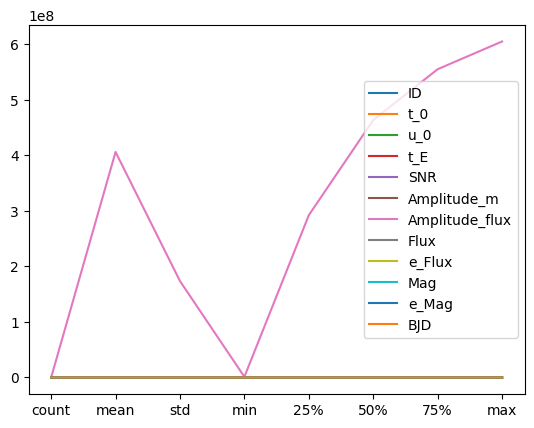

In [ ]:
df.describe().plot()

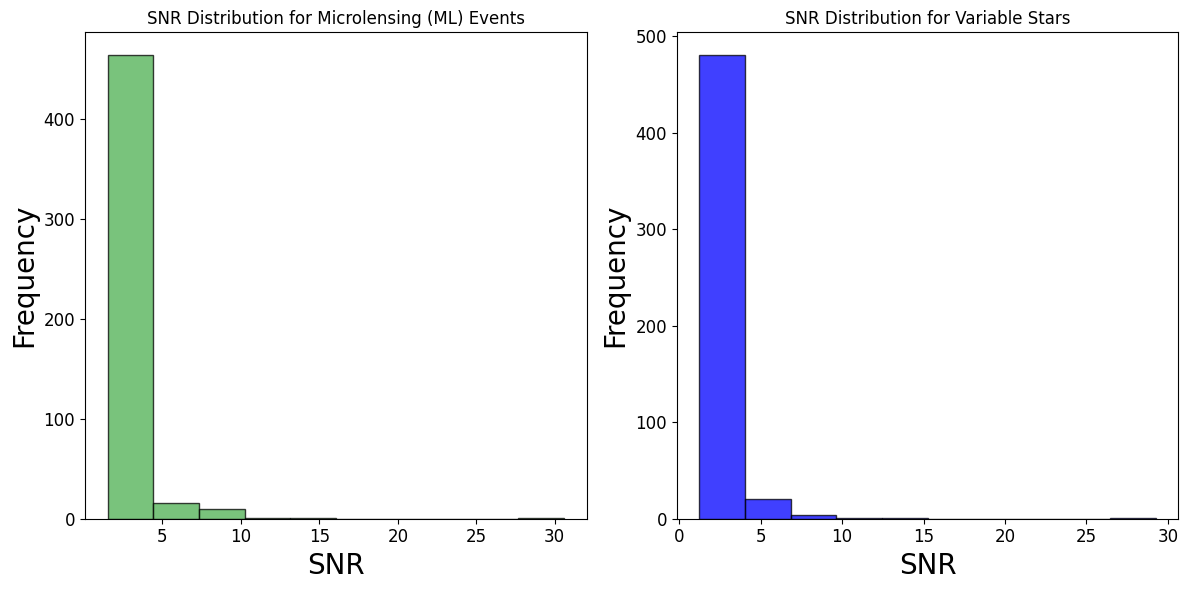

In [ ]:
import matplotlib.pyplot as plt

# Function to classify events
def classify_event(row):
    if row['u_0'] < 1 and row['SNR'] > 1.5:  # Microlensing event
        return 'ML'
    elif row['Amplitude_m'] > 0.1 or row['Amplitude_flux'] > 0.1:  # Variable star
        return 'Variable'
    else:  # Normal star
        return 'Normal'

# Apply classification to the dataset
df['Event_Type'] = df.apply(classify_event, axis=1)

# Separate the data based on event types
ml_events = df[df['Event_Type'] == 'ML']
variable_events = df[df['Event_Type'] == 'Variable']

# Plot histograms for SNR distribution
plt.figure(figsize=(12, 6))

# Histogram for ML events
plt.subplot(1, 2, 1)
plt.hist(ml_events['SNR'], bins=10, density=False, align='mid', color='#4CAF50', edgecolor='black', alpha=0.75)
plt.title('SNR Distribution for Microlensing (ML) Events')
plt.xlabel('SNR', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xscale('linear')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

##Histogram for Variable stars
plt.subplot(1, 2, 2)
plt.hist(variable_events['SNR'], bins=10, density=False, align='mid', color='blue', edgecolor='black', alpha=0.75)
plt.title('SNR Distribution for Variable Stars')
plt.xlabel('SNR', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xscale('linear')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)







# Adjust layout and show the plot
plt.tight_layout()
plt.show()


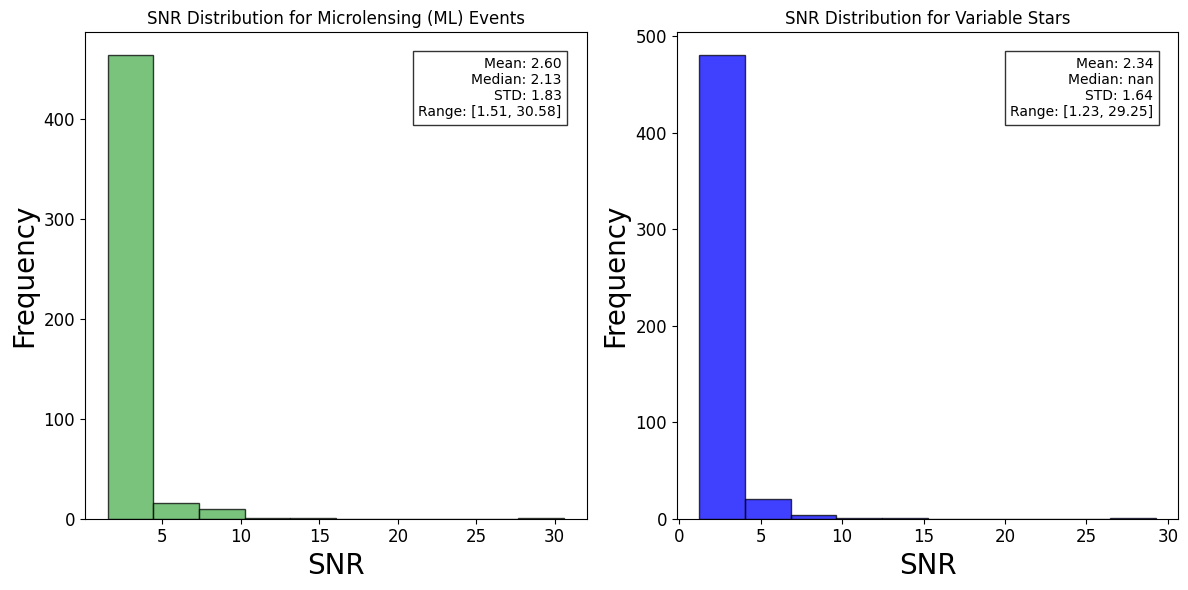

In [ ]:
import numpy as np

plt.figure(figsize=(12, 6))

#Histogram for ML events
plt.subplot(1, 2, 1)
plt.hist(ml_events['SNR'], bins=10, density=False, align='mid', color='#4CAF50', edgecolor='black', alpha=0.75)
plt.title('SNR Distribution for Microlensing (ML) Events')
plt.xlabel('SNR', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xscale('linear')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Add statistics for ML events
ml_mean = np.mean(ml_events['SNR'])
ml_median = np.median(ml_events['SNR'])
ml_std = np.std(ml_events['SNR'])
ml_min = np.min(ml_events['SNR'])
ml_max = np.max(ml_events['SNR'])

plt.text(0.95, 0.95, f"Mean: {ml_mean:.2f}\nMedian: {ml_median:.2f}\nSTD: {ml_std:.2f}\nRange: [{ml_min:.2f}, {ml_max:.2f}]",
transform=plt.gca().transAxes, ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

##Histogram for Variable events
plt.subplot(1, 2, 2)
plt.hist(variable_events['SNR'], bins=10, density=False, align='mid', color='blue', edgecolor='black', alpha=0.75)
plt.title('SNR Distribution for Variable Stars')
plt.xlabel('SNR', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xscale('linear')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Add statistics for Variable events
var_mean = np.mean(variable_events['SNR'])
var_median = np.median(variable_events['SNR'])
var_std = np.std(variable_events['SNR'])
var_min = np.min(variable_events['SNR'])
var_max = np.max(variable_events['SNR'])

plt.text(0.95, 0.95, f"Mean: {var_mean:.2f}\nMedian: {var_median:.2f}\nSTD: {var_std:.2f}\nRange: [{var_min:.2f}, {var_max:.2f}]",
transform=plt.gca().transAxes, ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

#Adjust layout and show the plot
plt.tight_layout()
plt.show()

Text(0.95, 0.95, 'Mean: 20.26\nMedian: 20.48\nSTD: 0.84\nRange: [14.69, 21.36]')

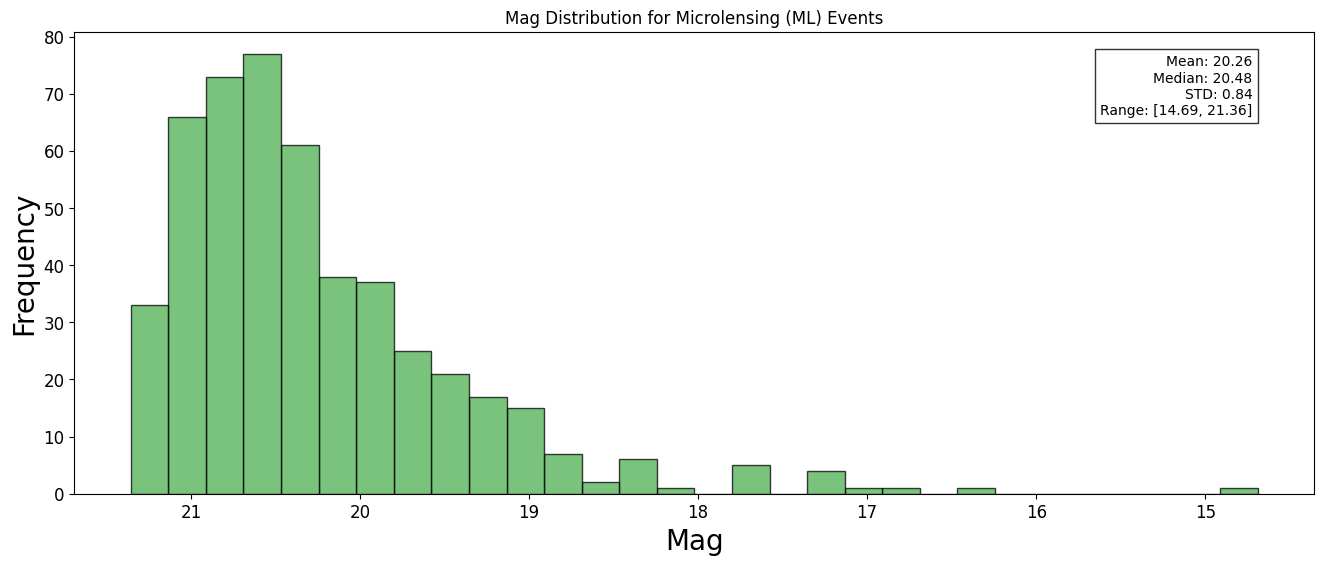

In [ ]:
import numpy as np

plt.figure(figsize=(16, 6))

#Histogram for ML events
#plt.subplot(1, 2, 1)
plt.hist(ml_events['Mag'], bins=30, density=False, align='mid', color='#4CAF50', edgecolor='black', alpha=0.75)



plt.title('Mag Distribution for Microlensing (ML) Events')
plt.xlabel('Mag',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xscale('linear')
#plt.xscale('log')
plt.gca().invert_xaxis()

#Add statistics for ML events
ml_mean = np.mean(ml_events['Mag'])
ml_median = np.median(ml_events['Mag'])
ml_std = np.std(ml_events['Mag'])
ml_min = np.min(ml_events['Mag'])
ml_max = np.max(ml_events['Mag'])

plt.text(0.95, 0.95, f"Mean: {ml_mean:.2f}\nMedian: {ml_median:.2f}\nSTD: {ml_std:.2f}\nRange: [{ml_min:.2f}, {ml_max:.2f}]",
transform=plt.gca().transAxes, ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))


Text(0.95, 0.95, 'Mean: 182.26\nMedian: 182.41\nSTD: 3.39\nRange: [172.29, 191.83]')

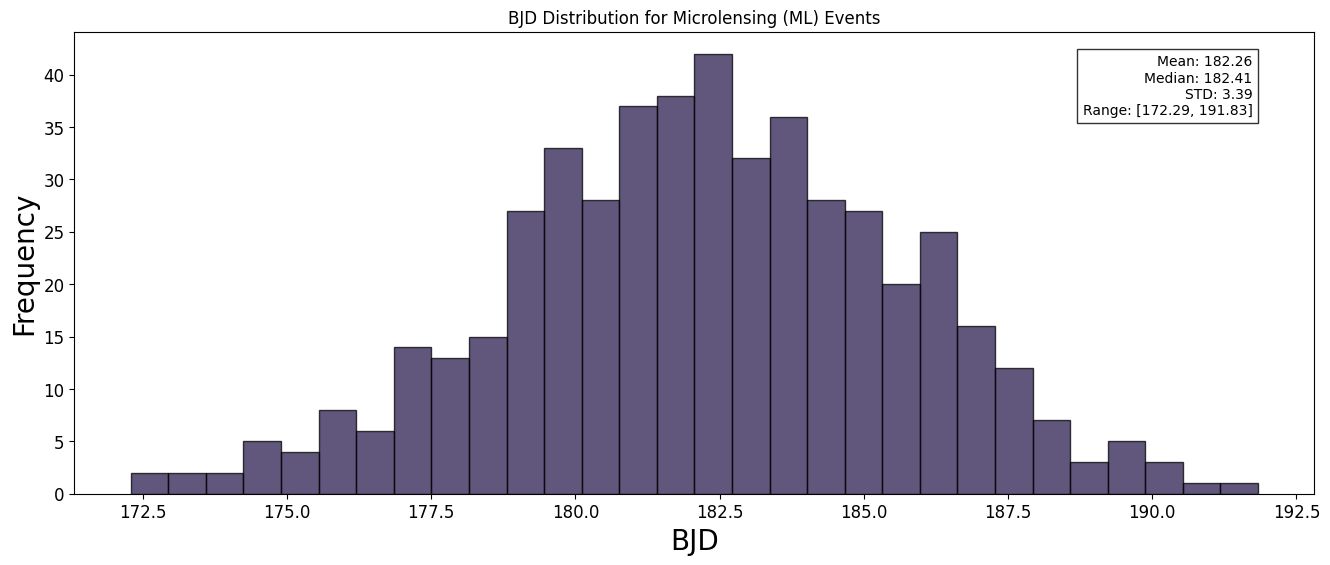

In [ ]:
import numpy as np

plt.figure(figsize=(16, 6))

#Histogram for ML events
#plt.subplot(1, 2, 1)
plt.hist(ml_events['BJD'], bins=30, density=False, align='mid', color='#2C1F50', edgecolor='black', alpha=0.75)



plt.title('BJD Distribution for Microlensing (ML) Events')
plt.xlabel('BJD',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.xscale('log')
#plt.gca().invert_xaxis()

#Add statistics for ML events
ml_mean = np.mean(ml_events['BJD'])
ml_median = np.median(ml_events['BJD'])
ml_std = np.std(ml_events['BJD'])
ml_min = np.min(ml_events['BJD'])
ml_max = np.max(ml_events['BJD'])

plt.text(0.95, 0.95, f"Mean: {ml_mean:.2f}\nMedian: {ml_median:.2f}\nSTD: {ml_std:.2f}\nRange: [{ml_min:.2f}, {ml_max:.2f}]",
transform=plt.gca().transAxes, ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))


Text(0.95, 0.95, 'Mean: 268518764.53\nMedian: 294792048.00\nSTD: 139491161.31\nRange: [1187533.25, 475804000.00]')

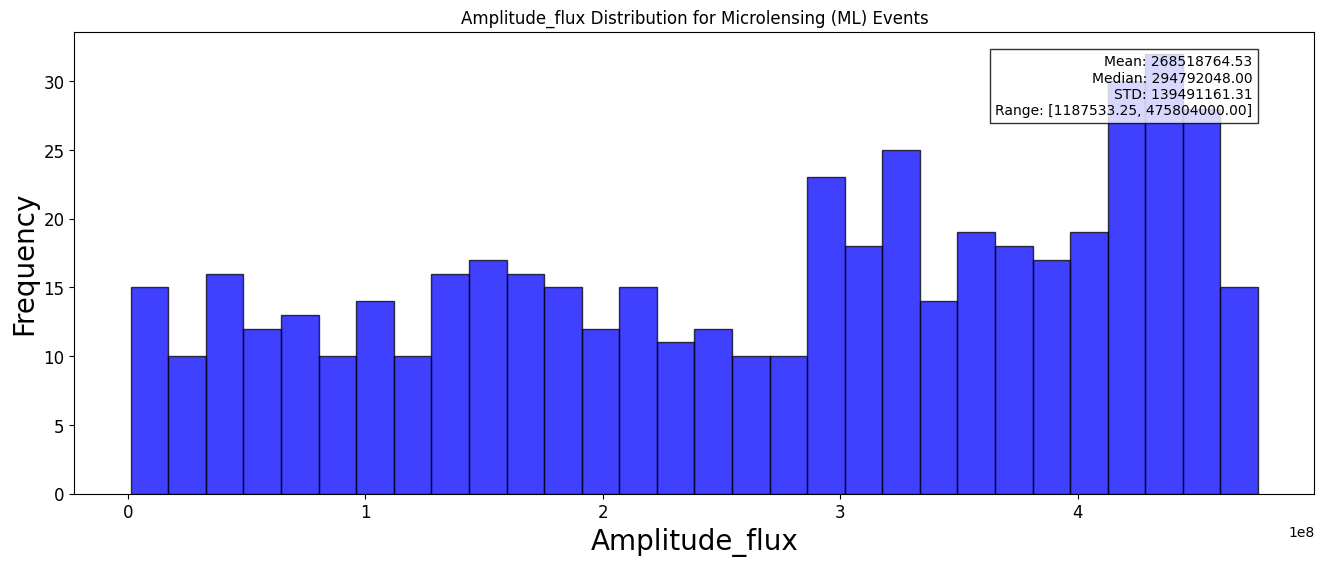

In [ ]:
import numpy as np

plt.figure(figsize=(16, 6))

#Histogram for ML events
#plt.subplot(1, 2, 1)
plt.hist(ml_events['Amplitude_flux'], bins=30, density=False, align='mid', color='blue', edgecolor='black', alpha=0.75)



plt.title('Amplitude_flux Distribution for Microlensing (ML) Events')
plt.xlabel('Amplitude_flux',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.xscale('log')
#plt.gca().invert_xaxis()

#Add statistics for ML events
ml_mean = np.mean(ml_events['Amplitude_flux'])
ml_median = np.median(ml_events['Amplitude_flux'])
ml_std = np.std(ml_events['Amplitude_flux'])
ml_min = np.min(ml_events['Amplitude_flux'])
ml_max = np.max(ml_events['Amplitude_flux'])

plt.text(0.95, 0.95, f"Mean: {ml_mean:.2f}\nMedian: {ml_median:.2f}\nSTD: {ml_std:.2f}\nRange: [{ml_min:.2f}, {ml_max:.2f}]",
transform=plt.gca().transAxes, ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))


Text(0.95, 0.95, 'Mean: 1.21\nMedian: 0.83\nSTD: 1.00\nRange: [0.31, 6.81]')

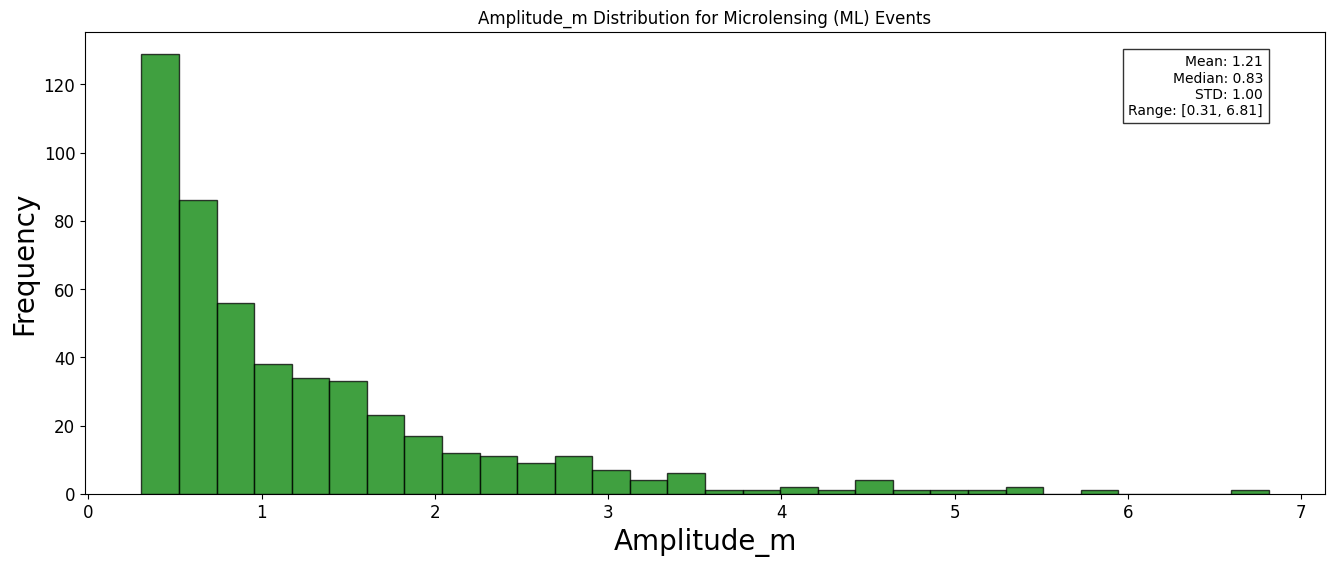

In [ ]:
import numpy as np

plt.figure(figsize=(16, 6))

#Histogram for ML events
#plt.subplot(1, 2, 1)
plt.hist(ml_events['Amplitude_m'], bins=30, density=False, align='mid', color='green', edgecolor='black', alpha=0.75)



plt.title('Amplitude_m Distribution for Microlensing (ML) Events')
plt.xlabel('Amplitude_m',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.xscale('log')
#plt.gca().invert_xaxis()

#Add statistics for ML events
ml_mean = np.mean(ml_events['Amplitude_m'])
ml_median = np.median(ml_events['Amplitude_m'])
ml_std = np.std(ml_events['Amplitude_m'])
ml_min = np.min(ml_events['Amplitude_m'])
ml_max = np.max(ml_events['Amplitude_m'])

plt.text(0.95, 0.95, f"Mean: {ml_mean:.2f}\nMedian: {ml_median:.2f}\nSTD: {ml_std:.2f}\nRange: [{ml_min:.2f}, {ml_max:.2f}]",
transform=plt.gca().transAxes, ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))


Text(0.95, 0.95, 'Mean: 54.46\nMedian: 54.81\nSTD: 26.61\nRange: [5.02, 99.79]')

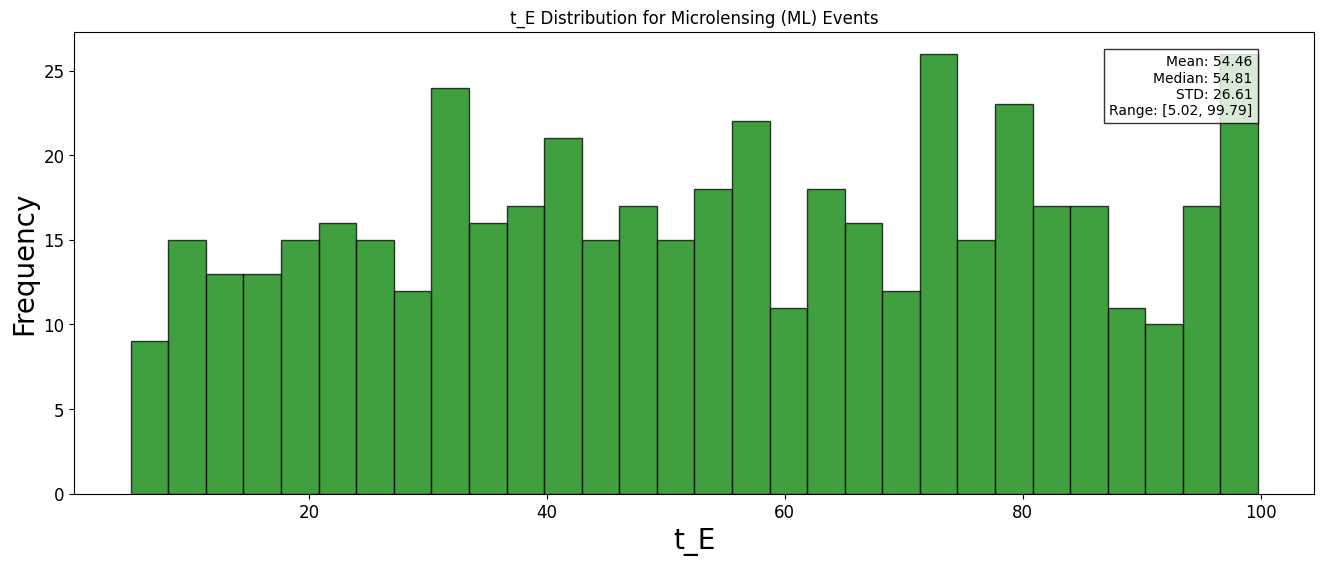

In [ ]:
import numpy as np

plt.figure(figsize=(16, 6))

#Histogram for ML events
#plt.subplot(1, 2, 1)
plt.hist(ml_events['t_E'], bins=30, density=False, align='mid', color='green', edgecolor='black', alpha=0.75)



plt.title('t_E Distribution for Microlensing (ML) Events')
plt.xlabel('t_E',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.xscale('log')
#plt.gca().invert_xaxis()

#Add statistics for ML events
ml_mean = np.mean(ml_events['t_E'])
ml_median = np.median(ml_events['t_E'])
ml_std = np.std(ml_events['t_E'])
ml_min = np.min(ml_events['t_E'])
ml_max = np.max(ml_events['t_E'])

plt.text(0.95, 0.95, f"Mean: {ml_mean:.2f}\nMedian: {ml_median:.2f}\nSTD: {ml_std:.2f}\nRange: [{ml_min:.2f}, {ml_max:.2f}]",
transform=plt.gca().transAxes, ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))


Text(0.95, 0.95, 'Mean: 2.58\nMedian: 2.12\nSTD: 1.83\nRange: [1.49, 30.59]')

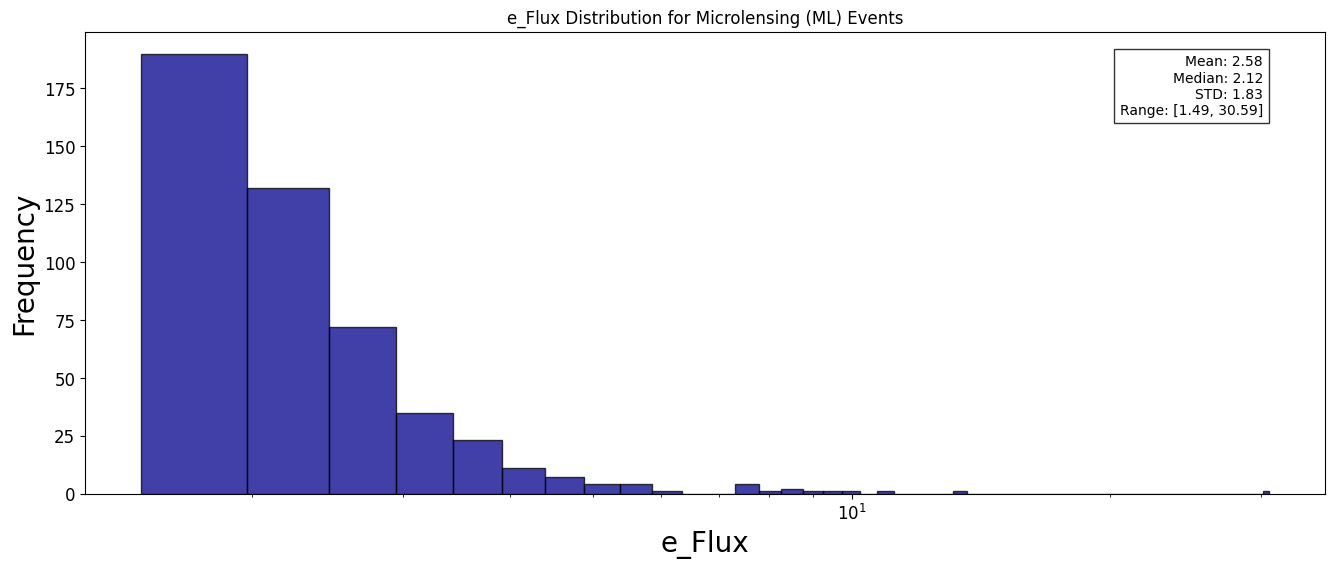

In [ ]:
import numpy as np

plt.figure(figsize=(16, 6))

#Histogram for ML events
#plt.subplot(1, 2, 1)
plt.hist(ml_events['e_Flux'], bins=60, density=False, align='mid', color='darkblue', edgecolor='black', alpha=0.75)



plt.title('e_Flux Distribution for Microlensing (ML) Events')
plt.xlabel('e_Flux',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xscale('log')
#plt.gca().invert_xaxis()

#Add statistics for ML events
ml_mean = np.mean(ml_events['e_Flux'])
ml_median = np.median(ml_events['e_Flux'])
ml_std = np.std(ml_events['e_Flux'])
ml_min = np.min(ml_events['e_Flux'])
ml_max = np.max(ml_events['e_Flux'])

plt.text(0.95, 0.95, f"Mean: {ml_mean:.2f}\nMedian: {ml_median:.2f}\nSTD: {ml_std:.2f}\nRange: [{ml_min:.2f}, {ml_max:.2f}]",
transform=plt.gca().transAxes, ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))


Text(0.95, 0.95, 'Mean: 0.54\nMedian: 0.56\nSTD: 0.17\nRange: [0.04, 0.88]')

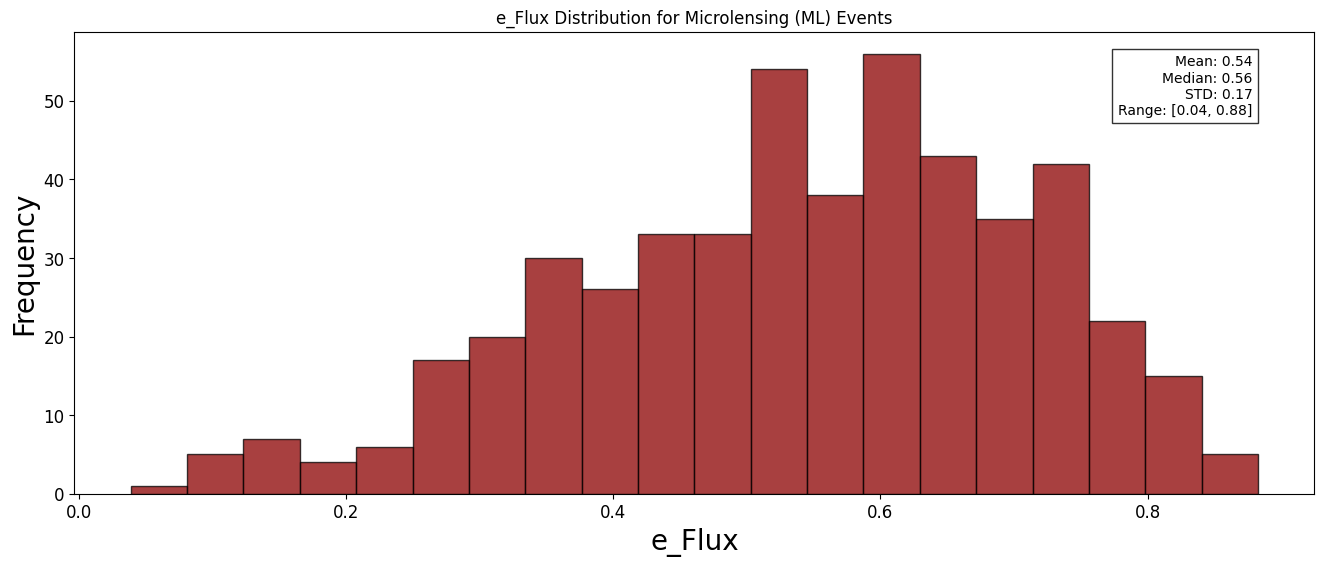

In [ ]:
import numpy as np

plt.figure(figsize=(16, 6))

#Histogram for ML events
#plt.subplot(1, 2, 1)
plt.hist(ml_events['e_Mag'], bins=20, density=False, align='mid', color='darkred', edgecolor='black', alpha=0.75)



plt.title('e_Flux Distribution for Microlensing (ML) Events')
plt.xlabel('e_Flux',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.xscale('log')
#plt.gca().invert_xaxis()

#Add statistics for ML events
ml_mean = np.mean(ml_events['e_Mag'])
ml_median = np.median(ml_events['e_Mag'])
ml_std = np.std(ml_events['e_Mag'])
ml_min = np.min(ml_events['e_Mag'])
ml_max = np.max(ml_events['e_Mag'])

plt.text(0.95, 0.95, f"Mean: {ml_mean:.2f}\nMedian: {ml_median:.2f}\nSTD: {ml_std:.2f}\nRange: [{ml_min:.2f}, {ml_max:.2f}]",
transform=plt.gca().transAxes, ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))


Text(0.95, 0.95, 'Mean: 178.16\nMedian: 179.09\nSTD: 104.33\nRange: [0.25, 364.36]')

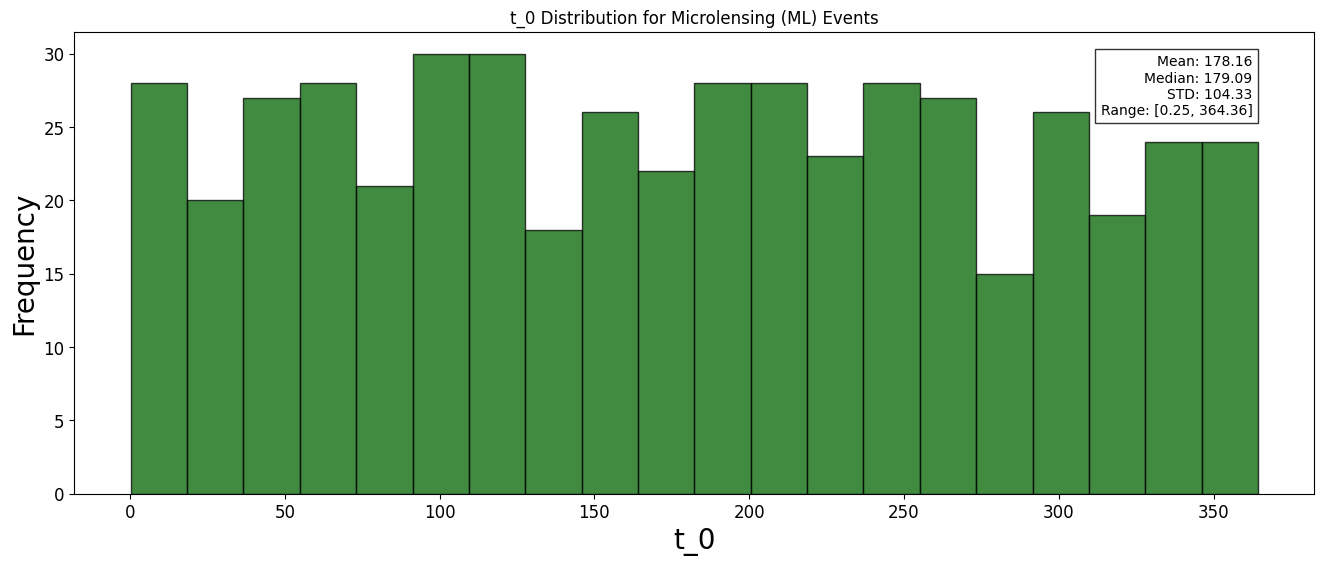

In [ ]:
import numpy as np

plt.figure(figsize=(16, 6))

#Histogram for ML events
#plt.subplot(1, 2, 1)
plt.hist(ml_events['t_0'], bins=20, density=False, align='mid', color='darkgreen', edgecolor='black', alpha=0.75)



plt.title('t_0 Distribution for Microlensing (ML) Events')
plt.xlabel('t_0',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.xscale('log')
#plt.gca().invert_xaxis()

#Add statistics for ML events
ml_mean = np.mean(ml_events['t_0'])
ml_median = np.median(ml_events['t_0'])
ml_std = np.std(ml_events['t_0'])
ml_min = np.min(ml_events['t_0'])
ml_max = np.max(ml_events['t_0'])

plt.text(0.95, 0.95, f"Mean: {ml_mean:.2f}\nMedian: {ml_median:.2f}\nSTD: {ml_std:.2f}\nRange: [{ml_min:.2f}, {ml_max:.2f}]",
transform=plt.gca().transAxes, ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))


Text(0.95, 0.95, 'Mean: 0.49\nMedian: 0.51\nSTD: 0.29\nRange: [0.00, 1.00]')

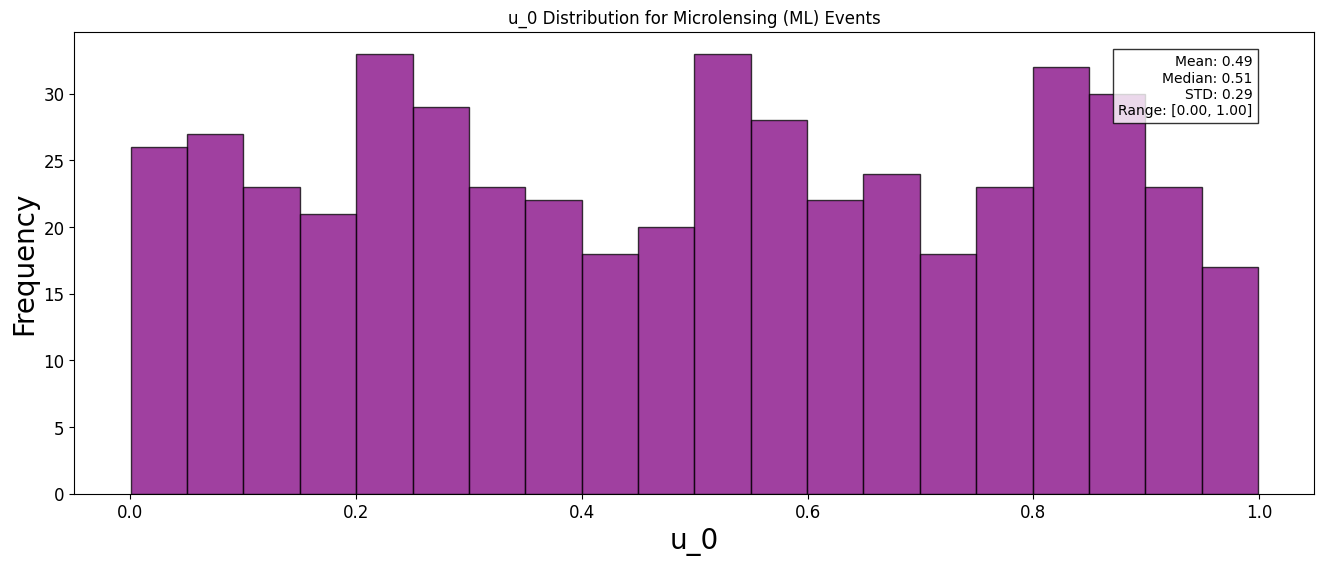

In [ ]:
import numpy as np

plt.figure(figsize=(16, 6))

#Histogram for ML events
#plt.subplot(1, 2, 1)
plt.hist(ml_events['u_0'], bins=20, density=False, align='mid', color='purple', edgecolor='black', alpha=0.75)



plt.title('u_0 Distribution for Microlensing (ML) Events')
plt.xlabel('u_0',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.xscale('log')
#plt.gca().invert_xaxis()

#Add statistics for ML events
ml_mean = np.mean(ml_events['u_0'])
ml_median = np.median(ml_events['u_0'])
ml_std = np.std(ml_events['u_0'])
ml_min = np.min(ml_events['u_0'])
ml_max = np.max(ml_events['u_0'])

plt.text(0.95, 0.95, f"Mean: {ml_mean:.2f}\nMedian: {ml_median:.2f}\nSTD: {ml_std:.2f}\nRange: [{ml_min:.2f}, {ml_max:.2f}]",
transform=plt.gca().transAxes, ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))


In [ ]:
df

,ID,t_0,u_0,t_E,SNR,Amplitude_m,Amplitude_flux,Flux,e_Flux,Mag,e_Mag,BJD,Event_Type
0,0,153.751297,1.838783,60.329746,2.032256,0.073615,589595392.0,3.700000,2.0173,20.541748,0.570956,178.764191,Variable
1,1,318.083649,0.472375,57.715794,3.090014,0.897497,276058496.0,7.400000,3.0804,19.612350,0.370560,184.450912,ML
2,2,40.922695,0.946846,32.042736,1.449947,0.351435,456484640.0,1.700000,1.4274,21.367643,0.861593,183.741455,Variable
3,3,119.003433,1.838452,92.336113,1.583401,0.066567,593435136.0,2.000000,1.5634,21.151110,0.771149,178.640839,Variable
4,4,317.387695,1.124507,23.626219,2.025195,0.255375,498712384.0,3.700000,2.0088,20.558680,0.577917,186.890335,Variable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,357.246735,0.046509,18.998245,5.492137,3.298682,30236188.0,25.700001,5.4862,18.374388,0.208424,178.002121,ML
996,996,345.926849,1.880705,24.160170,1.529001,0.075844,588386368.0,2.000000,1.5087,21.239227,0.808750,183.238464,Variable
997,997,38.320972,0.304822,94.239761,3.582255,1.315645,187820144.0,8.400000,3.5728,19.314207,0.325628,188.634094,ML
998,998,317.483154,1.573070,88.918129,1.497545,0.113607,568273216.0,1.800000,1.4735,21.299097,0.835969,182.825104,Variable


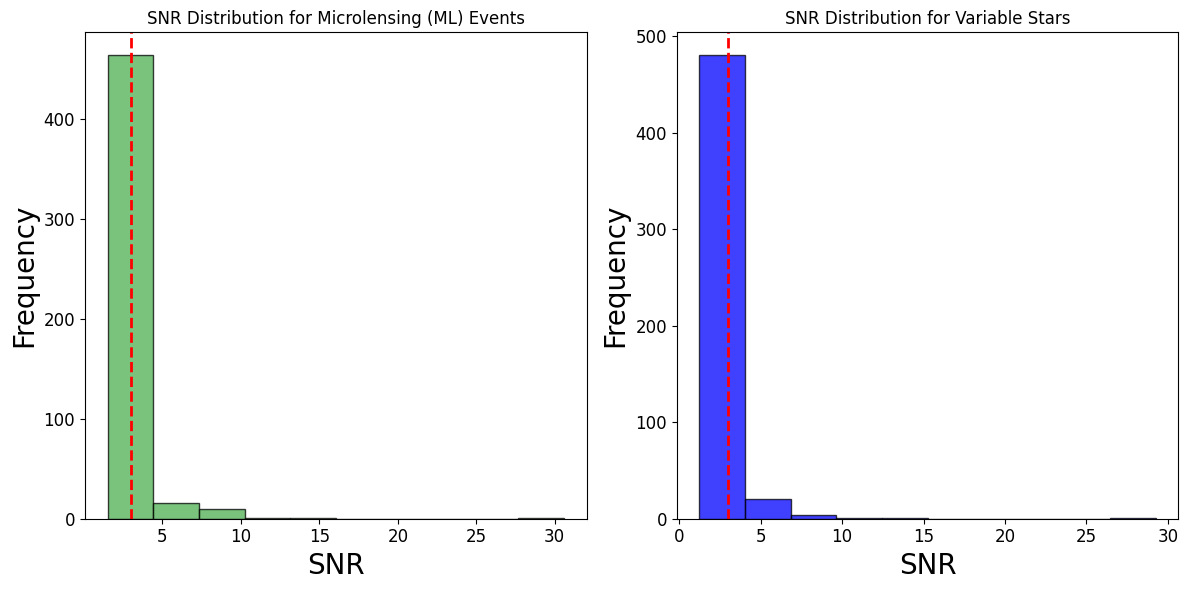

In [ ]:
import matplotlib.pyplot as plt

# Function to classify events
def classify_event(row):
    if row['u_0'] < 1 and row['SNR'] > 1.5:  # Microlensing event
        return 'ML'
    elif row['Amplitude_m'] > 0.1 or row['Amplitude_flux'] > 0.1:  # Variable star
        return 'Variable'
    else:  # Normal star
        return 'Normal'

# Apply classification to the dataset
df['Event_Type'] = df.apply(classify_event, axis=1)

# Separate the data based on event types
ml_events = df[df['Event_Type'] == 'ML']
variable_events = df[df['Event_Type'] == 'Variable']

# Plot histograms for SNR distribution
plt.figure(figsize=(12, 6))

# Histogram for ML events
plt.subplot(1, 2, 1)
plt.hist(ml_events['SNR'], bins=10, density=False, align='mid', color='#4CAF50', edgecolor='black', alpha=0.75)
plt.axvline(x=3, color='red', linestyle='--', linewidth=2)  # Vertical line at SNR = 3
plt.title('SNR Distribution for Microlensing (ML) Events')
plt.xlabel('SNR', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xscale('linear')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Histogram for Variable stars
plt.subplot(1, 2, 2)
plt.hist(variable_events['SNR'], bins=10, density=False, align='mid', color='blue', edgecolor='black', alpha=0.75)
plt.axvline(x=3, color='red', linestyle='--', linewidth=2)  # Vertical line at SNR = 3
plt.title('SNR Distribution for Variable Stars')
plt.xlabel('SNR', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xscale('linear')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
u0_median = df['u_0'].median()
snr_median = df['SNR'].median()
amplitude_m_median = df['Amplitude_m'].median()
amplitude_flux_median = df['Amplitude_flux'].median()


In [ ]:
amplitude_flux_median

463659056.0

In [ ]:
u0_median

0.9659487903118134

In [ ]:
snr_median

2.073071241378784

In [ ]:
amplitude_m_median

0.3345051556825638

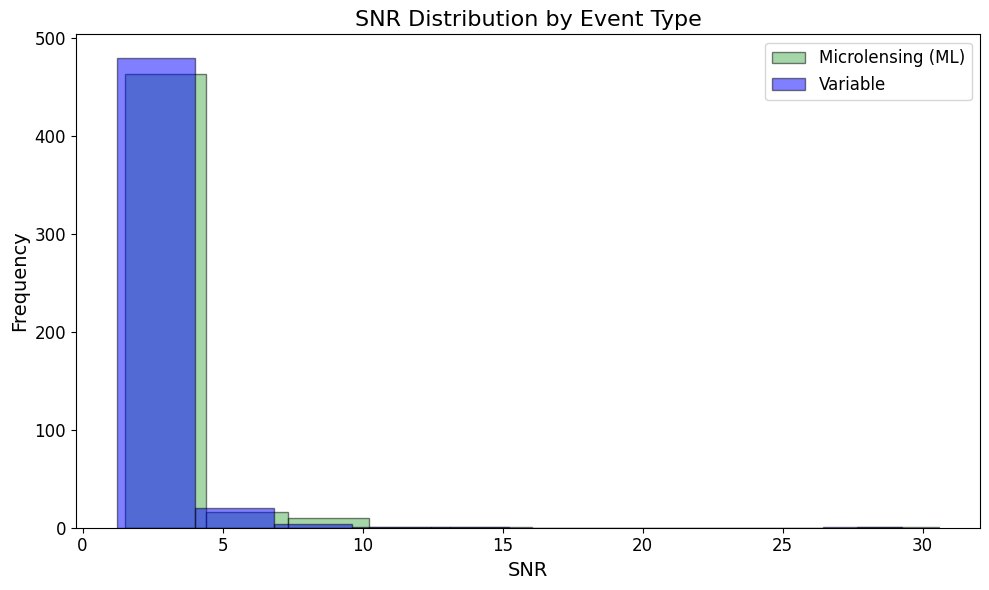

In [ ]:
import matplotlib.pyplot as plt

# Plot overlapping histograms for SNR distribution
plt.figure(figsize=(10, 6))

plt.hist(ml_events['SNR'], bins=10, alpha=0.5, label='Microlensing (ML)', color='#4CAF50', edgecolor='black')
plt.hist(variable_events['SNR'], bins=10, alpha=0.5, label='Variable', color='blue', edgecolor='black')
#plt.hist(normal_events['SNR'], bins=4, alpha=0.5, label='Normal', color='gray', edgecolor='black')

plt.title('SNR Distribution by Event Type', fontsize=16)
plt.xlabel('SNR', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xscale('linear')
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
df

,ID,t_0,u_0,t_E,SNR,Amplitude_m,Amplitude_flux,Flux,e_Flux,Mag,e_Mag,BJD,Event_Type
0,0,153.751297,1.838783,60.329746,2.032256,0.073615,589595392.0,3.700000,2.0173,20.541748,0.570956,178.764191,Variable
1,1,318.083649,0.472375,57.715794,3.090014,0.897497,276058496.0,7.400000,3.0804,19.612350,0.370560,184.450912,ML
2,2,40.922695,0.946846,32.042736,1.449947,0.351435,456484640.0,1.700000,1.4274,21.367643,0.861593,183.741455,Variable
3,3,119.003433,1.838452,92.336113,1.583401,0.066567,593435136.0,2.000000,1.5634,21.151110,0.771149,178.640839,Variable
4,4,317.387695,1.124507,23.626219,2.025195,0.255375,498712384.0,3.700000,2.0088,20.558680,0.577917,186.890335,Variable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,357.246735,0.046509,18.998245,5.492137,3.298682,30236188.0,25.700001,5.4862,18.374388,0.208424,178.002121,ML
996,996,345.926849,1.880705,24.160170,1.529001,0.075844,588386368.0,2.000000,1.5087,21.239227,0.808750,183.238464,Variable
997,997,38.320972,0.304822,94.239761,3.582255,1.315645,187820144.0,8.400000,3.5728,19.314207,0.325628,188.634094,ML
998,998,317.483154,1.573070,88.918129,1.497545,0.113607,568273216.0,1.800000,1.4735,21.299097,0.835969,182.825104,Variable


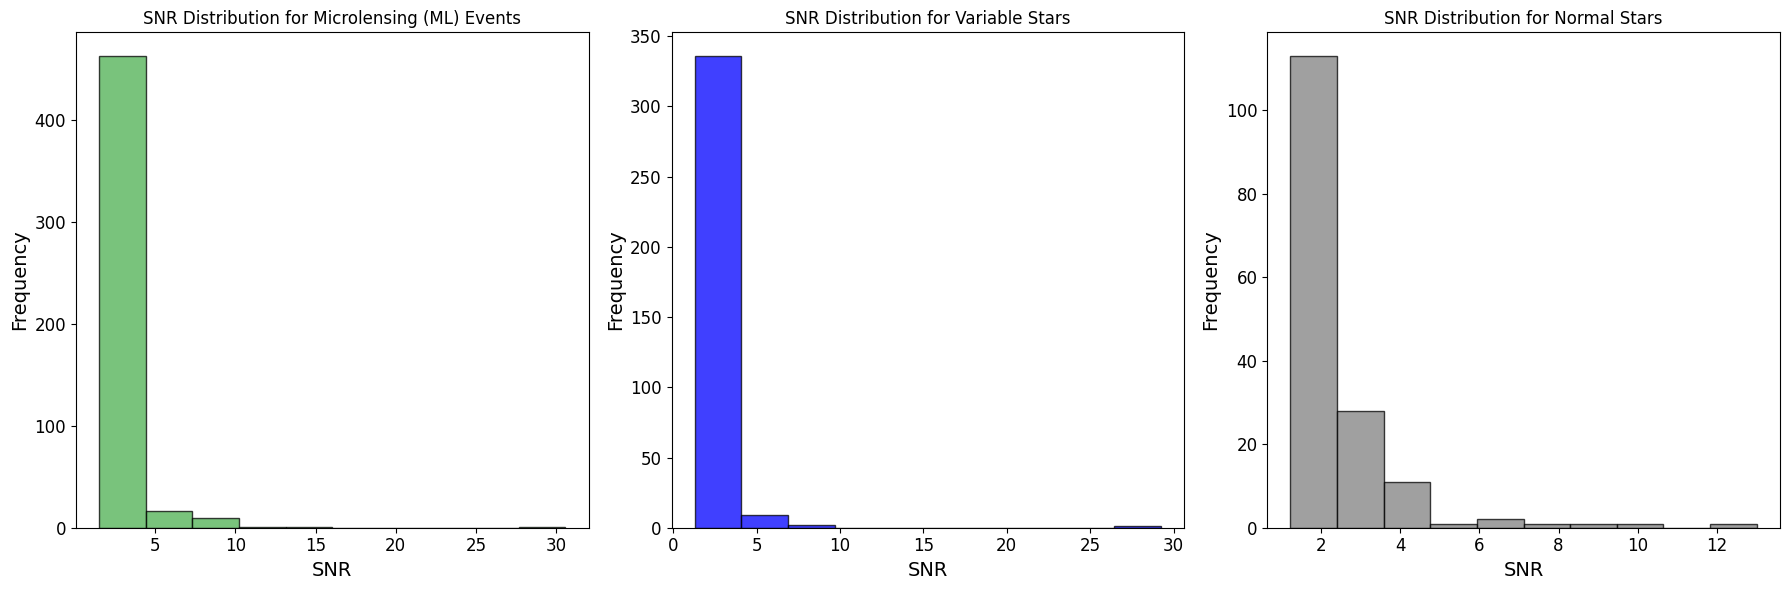

Statistics for Microlensing (ML) Events:
--------------------------------------
Total events: 492
Events with SNR > 3: 94
Events with SNR <= 3: 398
Percentage detected (SNR > 3): 19.11%
Mean SNR: 2.60
Median SNR: 2.13
Standard Deviation of SNR: 1.83


Statistics for Variable Events:
--------------------------------------
Total events: 348
Events with SNR > 3: 46
Events with SNR <= 3: 302
Percentage detected (SNR > 3): 13.22%
Mean SNR: 2.30
Median SNR: 1.99
Standard Deviation of SNR: 1.70


Statistics for Normal Events:
--------------------------------------
Total events: 160
Events with SNR > 3: 26
Events with SNR <= 3: 134
Percentage detected (SNR > 3): 16.25%
Mean SNR: 2.43
Median SNR: 2.02
Standard Deviation of SNR: 1.51


Overall Statistics:
---------------------
Total events: 1000
Events with SNR > 3: 166
Events with SNR <= 3: 834
Percentage detected (SNR > 3): 16.60%
Mean SNR: 2.47
Median SNR: 2.07
Standard Deviation of SNR: 1.74


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Your DataFrame
# Replace 'your_data.csv' with your actual data source
# df = pd.read_csv('your_data.csv')

# For demonstration, let's create a sample DataFrame
# Remove or replace this with your actual data loading step
# Step 2: Calculate Amplitude_flux Correctly
# Define the reference flux (F0)
# Adjust F0 based on your dataset's units and reference
F0 = 1

# Calculate Amplitude_flux using the correct formula
df['Amplitude_flux'] = F0 * (1 - 10**(-0.4 * df['Amplitude_m']))

# Optional: Round Amplitude_flux to desired decimal places
df['Amplitude_flux'] = np.round(df['Amplitude_flux'], 4)

# Step 3: Define the Classification Function
def classify_event(row):
    if row['u_0'] < 1 and row['SNR'] > 1.5:
        return 'ML'  # Microlensing event
    elif row['Amplitude_m'] > 0.1 or row['Amplitude_flux'] > 0.1:
        return 'Variable'  # Variable star
    else:
        return 'Normal'  # Normal star

# Step 4: Apply the Classification
df['Event_Type'] = df.apply(classify_event, axis=1)

# Step 5: Separate the Data Based on Event Types
ml_events = df[df['Event_Type'] == 'ML']
variable_events = df[df['Event_Type'] == 'Variable']
normal_events = df[df['Event_Type'] == 'Normal']

# Step 6: Plot Histograms for SNR Distribution
plt.figure(figsize=(18, 6))

# Histogram for ML events
plt.subplot(1, 3, 1)
plt.hist(ml_events['SNR'], bins=10, color='#4CAF50', edgecolor='black', alpha=0.75)
plt.title('SNR Distribution for Microlensing (ML) Events')
plt.xlabel('SNR', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xscale('linear')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Histogram for Variable stars
plt.subplot(1, 3, 2)
plt.hist(variable_events['SNR'], bins=10, color='blue', edgecolor='black', alpha=0.75)
plt.title('SNR Distribution for Variable Stars')
plt.xlabel('SNR', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xscale('linear')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Histogram for Normal stars
plt.subplot(1, 3, 3)
plt.hist(normal_events['SNR'], bins=10, color='gray', edgecolor='black', alpha=0.75)
plt.title('SNR Distribution for Normal Stars')
plt.xlabel('SNR', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xscale('linear')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Step 7: Calculate and Display Statistics
def calculate_stats(subset, event_type, snr_threshold=3):
    total_events = len(subset)
    events_above_threshold = subset[subset['SNR'] > snr_threshold]
    num_above = len(events_above_threshold)
    num_below = total_events - num_above
    percentage_detected = (num_above / total_events) * 100 if total_events > 0 else 0
    mean_snr = subset['SNR'].mean()
    median_snr = subset['SNR'].median()
    std_snr = subset['SNR'].std()

    print(f"Statistics for {event_type} Events:")
    print(f"--------------------------------------")
    print(f"Total events: {total_events}")
    print(f"Events with SNR > {snr_threshold}: {num_above}")
    print(f"Events with SNR <= {snr_threshold}: {num_below}")
    print(f"Percentage detected (SNR > {snr_threshold}): {percentage_detected:.2f}%")
    print(f"Mean SNR: {mean_snr:.2f}")
    print(f"Median SNR: {median_snr:.2f}")
    print(f"Standard Deviation of SNR: {std_snr:.2f}")
    print("\n")

# Calculate statistics for each event type
calculate_stats(ml_events, 'Microlensing (ML)')
calculate_stats(variable_events, 'Variable')
calculate_stats(normal_events, 'Normal')

# Calculate overall statistics
total_events = len(df)
events_above_threshold = df[df['SNR'] > 3]
num_above = len(events_above_threshold)
num_below = total_events - num_above
percentage_detected = (num_above / total_events) * 100 if total_events > 0 else 0
mean_snr = df['SNR'].mean()
median_snr = df['SNR'].median()
std_snr = df['SNR'].std()

print("Overall Statistics:")
print("---------------------")
print(f"Total events: {total_events}")
print(f"Events with SNR > 3: {num_above}")
print(f"Events with SNR <= 3: {num_below}")
print(f"Percentage detected (SNR > 3): {percentage_detected:.2f}%")
print(f"Mean SNR: {mean_snr:.2f}")
print(f"Median SNR: {median_snr:.2f}")
print(f"Standard Deviation of SNR: {std_snr:.2f}")


In [ ]:
df

,ID,t_0,u_0,t_E,SNR,Amplitude_m,Amplitude_flux,Flux,e_Flux,Mag,e_Mag,BJD,Event_Type
0,0,153.751297,1.838783,60.329746,2.032256,0.073615,0.0656,3.700000,2.0173,20.541748,0.570956,178.764191,Normal
1,1,318.083649,0.472375,57.715794,3.090014,0.897497,0.5625,7.400000,3.0804,19.612350,0.370560,184.450912,ML
2,2,40.922695,0.946846,32.042736,1.449947,0.351435,0.2765,1.700000,1.4274,21.367643,0.861593,183.741455,Variable
3,3,119.003433,1.838452,92.336113,1.583401,0.066567,0.0595,2.000000,1.5634,21.151110,0.771149,178.640839,Normal
4,4,317.387695,1.124507,23.626219,2.025195,0.255375,0.2096,3.700000,2.0088,20.558680,0.577917,186.890335,Variable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,357.246735,0.046509,18.998245,5.492137,3.298682,0.9521,25.700001,5.4862,18.374388,0.208424,178.002121,ML
996,996,345.926849,1.880705,24.160170,1.529001,0.075844,0.0675,2.000000,1.5087,21.239227,0.808750,183.238464,Normal
997,997,38.320972,0.304822,94.239761,3.582255,1.315645,0.7023,8.400000,3.5728,19.314207,0.325628,188.634094,ML
998,998,317.483154,1.573070,88.918129,1.497545,0.113607,0.0993,1.800000,1.4735,21.299097,0.835969,182.825104,Variable


In [ ]:

df['Event_Type'].count()

1000

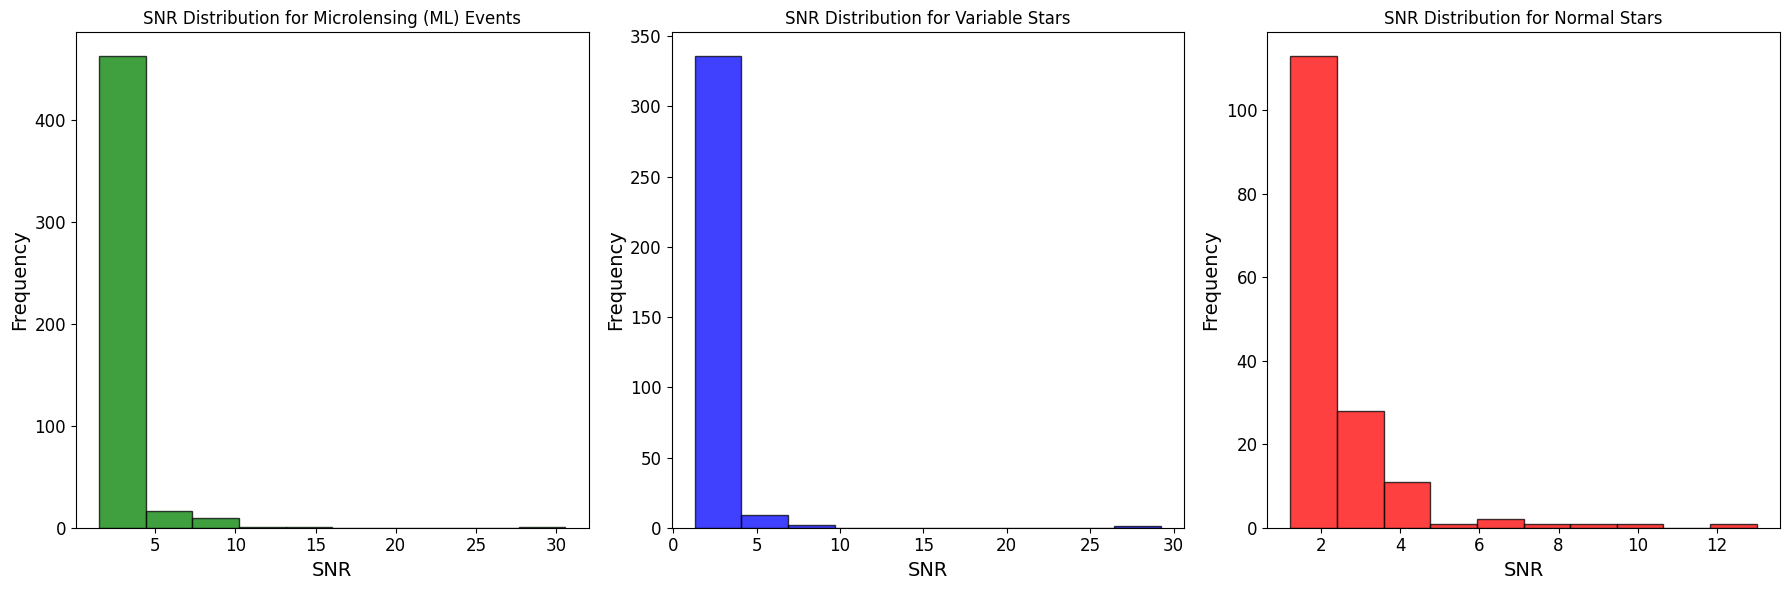

Statistics for Microlensing (ML) Events:
--------------------------------------
Total events: 492
Events with SNR > 3: 94
Events with SNR <= 3: 398
Percentage detected (SNR > 3): 19.11%
Mean SNR: 2.60
Median SNR: 2.13
Standard Deviation of SNR: 1.83


Statistics for Variable Events:
--------------------------------------
Total events: 348
Events with SNR > 3: 46
Events with SNR <= 3: 302
Percentage detected (SNR > 3): 13.22%
Mean SNR: 2.30
Median SNR: 1.99
Standard Deviation of SNR: 1.70


Statistics for Normal Events:
--------------------------------------
Total events: 160
Events with SNR > 3: 26
Events with SNR <= 3: 134
Percentage detected (SNR > 3): 16.25%
Mean SNR: 2.43
Median SNR: 2.02
Standard Deviation of SNR: 1.51


Overall Statistics:
---------------------
Total events: 1000
Events with SNR > 3: 166
Events with SNR <= 3: 834
Percentage detected (SNR > 3): 16.60%
Mean SNR: 2.47
Median SNR: 2.07
Standard Deviation of SNR: 1.74


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


F0 = 1

# Calculate Amplitude_flux using the correct formula
df['Amplitude_flux'] = F0 * (1 - 10**(-0.4 * df['Amplitude_m']))

# Optional: Round Amplitude_flux to desired decimal places
df['Amplitude_flux'] = np.round(df['Amplitude_flux'], 4)

# Step 3: Define the Classification Function
def classify_event(row):
    if row['u_0'] < 1 and row['SNR'] > 1.5:
        return 'ML'  # Microlensing event
    elif row['Amplitude_m'] > 0.1 or row['Amplitude_flux'] > 0.1:
        return 'Variable'  # Variable star
    else:
        return 'Normal'  # Normal star

# Step 4: Apply the Classification
df['Event_Type'] = df.apply(classify_event, axis=1)

# Step 5: Separate the Data Based on Event Types
ml_events = df[df['Event_Type'] == 'ML']
variable_events = df[df['Event_Type'] == 'Variable']
normal_events = df[df['Event_Type'] == 'Normal']

# Step 6: Plot Histograms for SNR Distribution
plt.figure(figsize=(18, 6))

# Histogram for ML events
plt.subplot(1, 3, 1)
plt.hist(ml_events['SNR'], bins=10, color='green', edgecolor='black', alpha=0.75)
plt.title('SNR Distribution for Microlensing (ML) Events')
plt.xlabel('SNR', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xscale('linear')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Histogram for Variable stars
plt.subplot(1, 3, 2)
plt.hist(variable_events['SNR'], bins=10, color='blue', edgecolor='black', alpha=0.75)
plt.title('SNR Distribution for Variable Stars')
plt.xlabel('SNR', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xscale('linear')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Histogram for Normal stars
plt.subplot(1, 3, 3)
plt.hist(normal_events['SNR'], bins=10, color='red', edgecolor='black', alpha=0.75)
plt.title('SNR Distribution for Normal Stars')
plt.xlabel('SNR', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xscale('linear')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Step 7: Calculate and Display Statistics
def calculate_stats(subset, event_type, snr_threshold=3):
    total_events = len(subset)
    events_above_threshold = subset[subset['SNR'] > snr_threshold]
    num_above = len(events_above_threshold)
    num_below = total_events - num_above
    percentage_detected = (num_above / total_events) * 100 if total_events > 0 else 0
    mean_snr = subset['SNR'].mean()
    median_snr = subset['SNR'].median()
    std_snr = subset['SNR'].std()

    print(f"Statistics for {event_type} Events:")
    print(f"--------------------------------------")
    print(f"Total events: {total_events}")
    print(f"Events with SNR > {snr_threshold}: {num_above}")
    print(f"Events with SNR <= {snr_threshold}: {num_below}")
    print(f"Percentage detected (SNR > {snr_threshold}): {percentage_detected:.2f}%")
    print(f"Mean SNR: {mean_snr:.2f}")
    print(f"Median SNR: {median_snr:.2f}")
    print(f"Standard Deviation of SNR: {std_snr:.2f}")
    print("\n")

# Calculate statistics for each event type
calculate_stats(ml_events, 'Microlensing (ML)')
calculate_stats(variable_events, 'Variable')
calculate_stats(normal_events, 'Normal')

# Calculate overall statistics
total_events = len(df)
events_above_threshold = df[df['SNR'] > 3]
num_above = len(events_above_threshold)
num_below = total_events - num_above
percentage_detected = (num_above / total_events) * 100 if total_events > 0 else 0
mean_snr = df['SNR'].mean()
median_snr = df['SNR'].median()
std_snr = df['SNR'].std()

print("Overall Statistics:")
print("---------------------")
print(f"Total events: {total_events}")
print(f"Events with SNR > 3: {num_above}")
print(f"Events with SNR <= 3: {num_below}")
print(f"Percentage detected (SNR > 3): {percentage_detected:.2f}%")
print(f"Mean SNR: {mean_snr:.2f}")
print(f"Median SNR: {median_snr:.2f}")
print(f"Standard Deviation of SNR: {std_snr:.2f}")


In [4]:
df

,ID,t_0,u_0,t_E,SNR,Amplitude_m,Amplitude_flux,Flux,e_Flux,Mag,e_Mag,BJD,Event_Type
0,0,153.751297,1.838783,60.329746,2.032256,0.073615,0.0656,3.700000,2.0173,20.541748,0.570956,178.764191,Normal
1,1,318.083649,0.472375,57.715794,3.090014,0.897497,0.5625,7.400000,3.0804,19.612350,0.370560,184.450912,ML
2,2,40.922695,0.946846,32.042736,1.449947,0.351435,0.2765,1.700000,1.4274,21.367643,0.861593,183.741455,Variable
3,3,119.003433,1.838452,92.336113,1.583401,0.066567,0.0595,2.000000,1.5634,21.151110,0.771149,178.640839,Normal
4,4,317.387695,1.124507,23.626219,2.025195,0.255375,0.2096,3.700000,2.0088,20.558680,0.577917,186.890335,Variable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,357.246735,0.046509,18.998245,5.492137,3.298682,0.9521,25.700001,5.4862,18.374388,0.208424,178.002121,ML
996,996,345.926849,1.880705,24.160170,1.529001,0.075844,0.0675,2.000000,1.5087,21.239227,0.808750,183.238464,Normal
997,997,38.320972,0.304822,94.239761,3.582255,1.315645,0.7023,8.400000,3.5728,19.314207,0.325628,188.634094,ML
998,998,317.483154,1.573070,88.918129,1.497545,0.113607,0.0993,1.800000,1.4735,21.299097,0.835969,182.825104,Variable


In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('project.csv')

# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., imputation, interpolation, or removal)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)

# Ensure that the data is in a suitable format for analysis
# Convert time columns to a standard format
df['t_0'] = pd.to_datetime(df['t_0'])
df['t_E'] = pd.to_datetime(df['t_E'])


ID                0
t_0               0
u_0               0
t_E               0
SNR               1
Amplitude_m       0
Amplitude_flux    0
Flux              0
e_Flux            0
Mag               0
e_Mag             1
BJD               0
dtype: int64


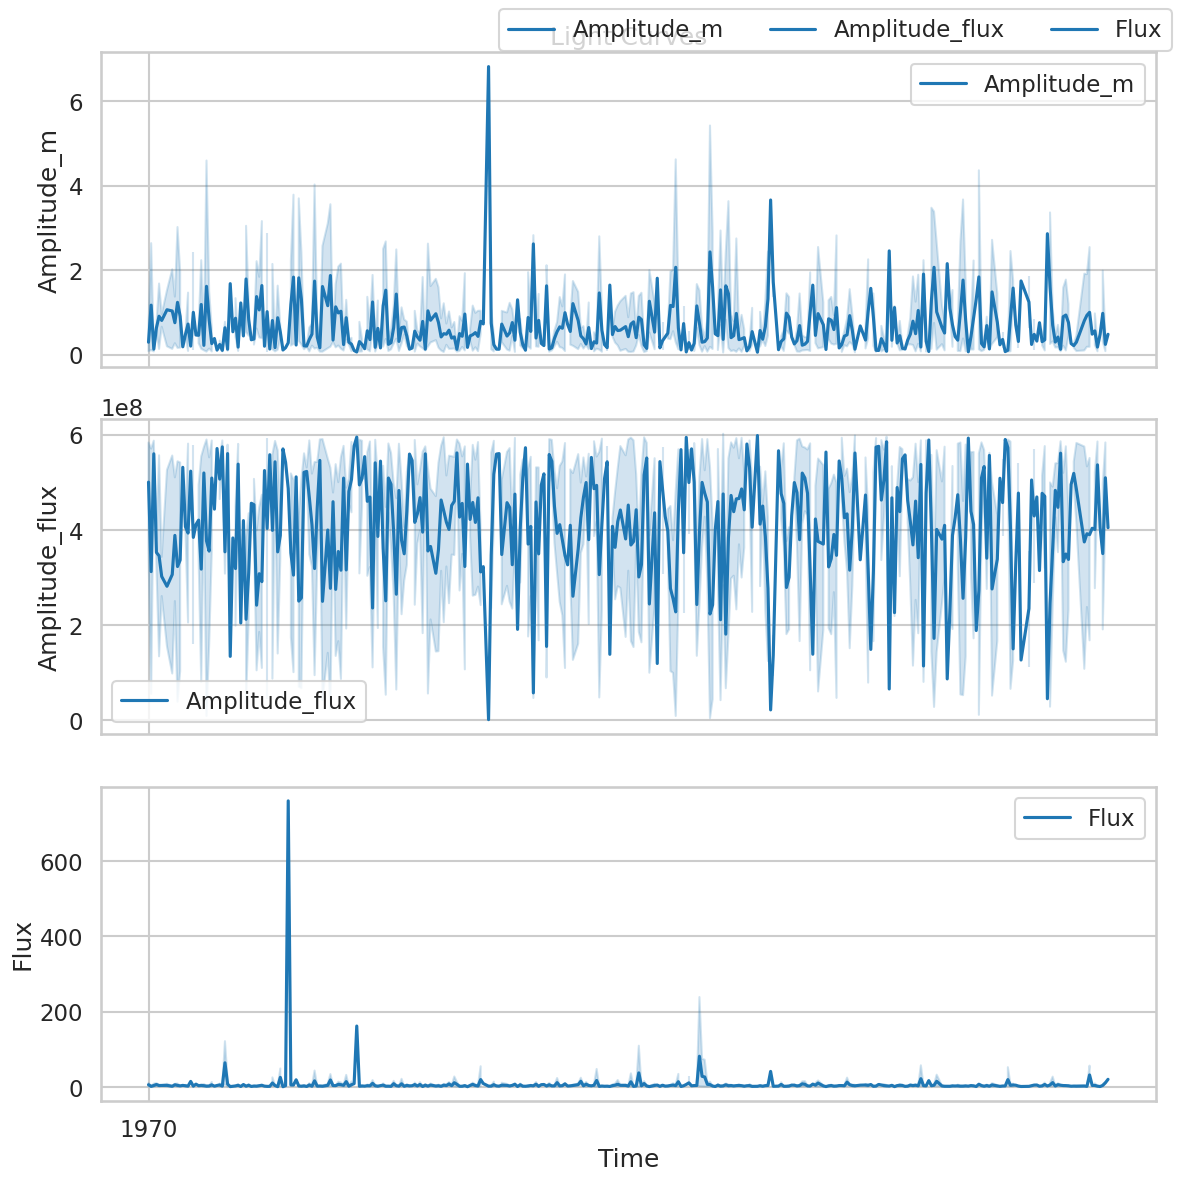

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice theme for the plot
sns.set_style("whitegrid")
sns.set_context("talk")

# Create a figure with three subplots
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 12), sharex=True)

# Plot the light curves for each star
sns.lineplot(x='t_0', y='Amplitude_m', data=df, ax=ax[0], label='Amplitude_m')
sns.lineplot(x='t_0', y='Amplitude_flux', data=df, ax=ax[1], label='Amplitude_flux')
sns.lineplot(x='t_0', y='Flux', data=df, ax=ax[2], label='Flux')

# Customize the plot
ax[0].set_title('Light Curves')
ax[0].set_ylabel('Amplitude_m')
ax[1].set_ylabel('Amplitude_flux')
ax[2].set_ylabel('Flux')
ax[2].set_xlabel('Time')

# Add a legend
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=3)

# Show the plot
plt.tight_layout()
plt.show()


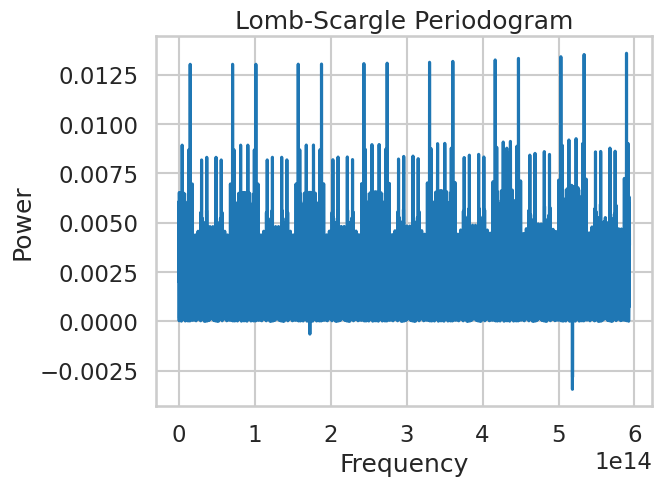

In [ ]:
from astropy.timeseries import LombScargle
import pandas as pd

# Convert the 't_0' column to a numerical representation, for example, relative days
# This is a key step to fix the error
df['t_0_numerical'] = (df['t_0'] - df['t_0'].min()).dt.total_seconds() / (24 * 3600) # Convert to relative days

# Compute the Lomb-Scargle periodogram using the numerical time representation
ls = LombScargle(df['t_0_numerical'], df['Amplitude_m'])
frequency, power = ls.autopower()

# Plot the results
plt.plot(frequency, power)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Lomb-Scargle Periodogram')
plt.show()

<ipython-input-50-0e88f092c978>:36: RuntimeWarning: invalid value encountered in sqrt
  amplitude = np.sqrt(2 * power)


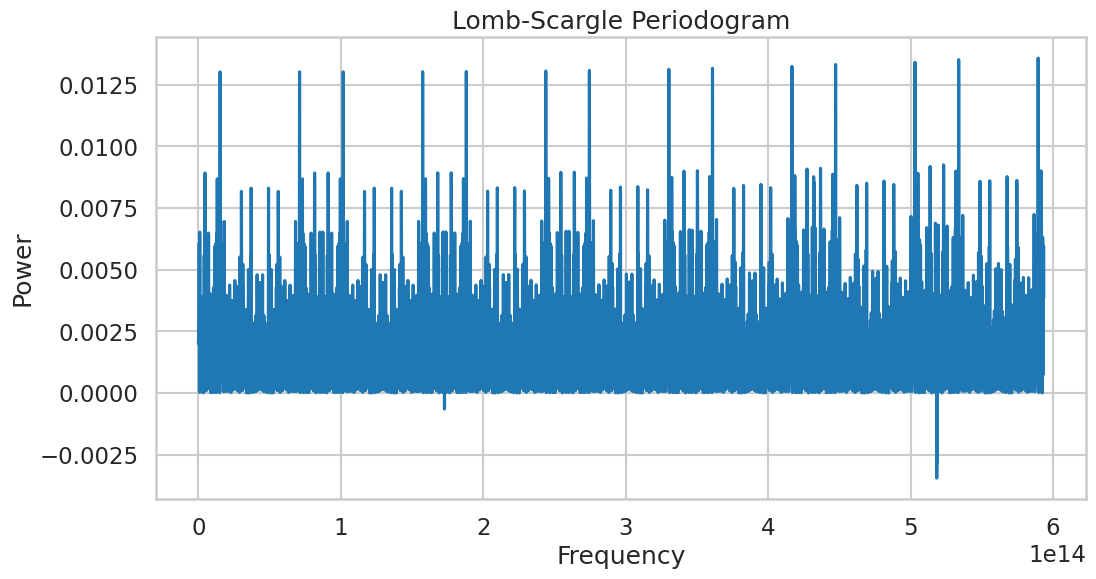

In [ ]:
import pandas as pd
import numpy as np
#from scipy.signal import periodogram, LombScargle # Remove this line as LombScargle is no longer here
from astropy.timeseries import LombScargle # Import LombScargle from the correct module
import matplotlib.pyplot as plt # import matplot

# Load the data
df = pd.read_csv('project.csv')

# Step 1: Data Cleaning and Preprocessing

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert time column to datetime format
df['t_0'] = pd.to_datetime(df['t_0'])

# Calculate the time difference between consecutive observations
df['dt'] = (df['t_0'] - df['t_0'].shift()).dt.total_seconds()

# Calculate the frequency of the observations
df['freq'] = 1 / df['dt']

# Calculate the amplitude and phase of the periodic signals using Lomb-Scargle periodogram
# LombScargle is now imported from astropy.timeseries

# Convert 't_0' to numerical representation (e.g., relative days since the first observation)
# This ensures LombScargle works correctly with datetime objects
t_0_numerical = (df['t_0'] - df['t_0'].min()).dt.total_seconds() / (24 * 3600)

# Calculate the Lomb-Scargle periodogram
freq, power = LombScargle(t_0_numerical, df['Amplitude_m'].values).autopower()
amplitude = np.sqrt(2 * power)
phase = np.arctan2(np.imag(amplitude), np.real(amplitude))

# Instead of adding amplitude and phase as columns, create a separate DataFrame
ls_results = pd.DataFrame({'Frequency': freq, 'Power': power, 'Amplitude': amplitude, 'Phase': phase})

# You can now analyze or plot the 'ls_results' DataFrame

# Plot the Lomb-Scargle periodogram
plt.figure(figsize=(12, 6))
plt.plot(freq, power)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Lomb-Scargle Periodogram')
plt.show()

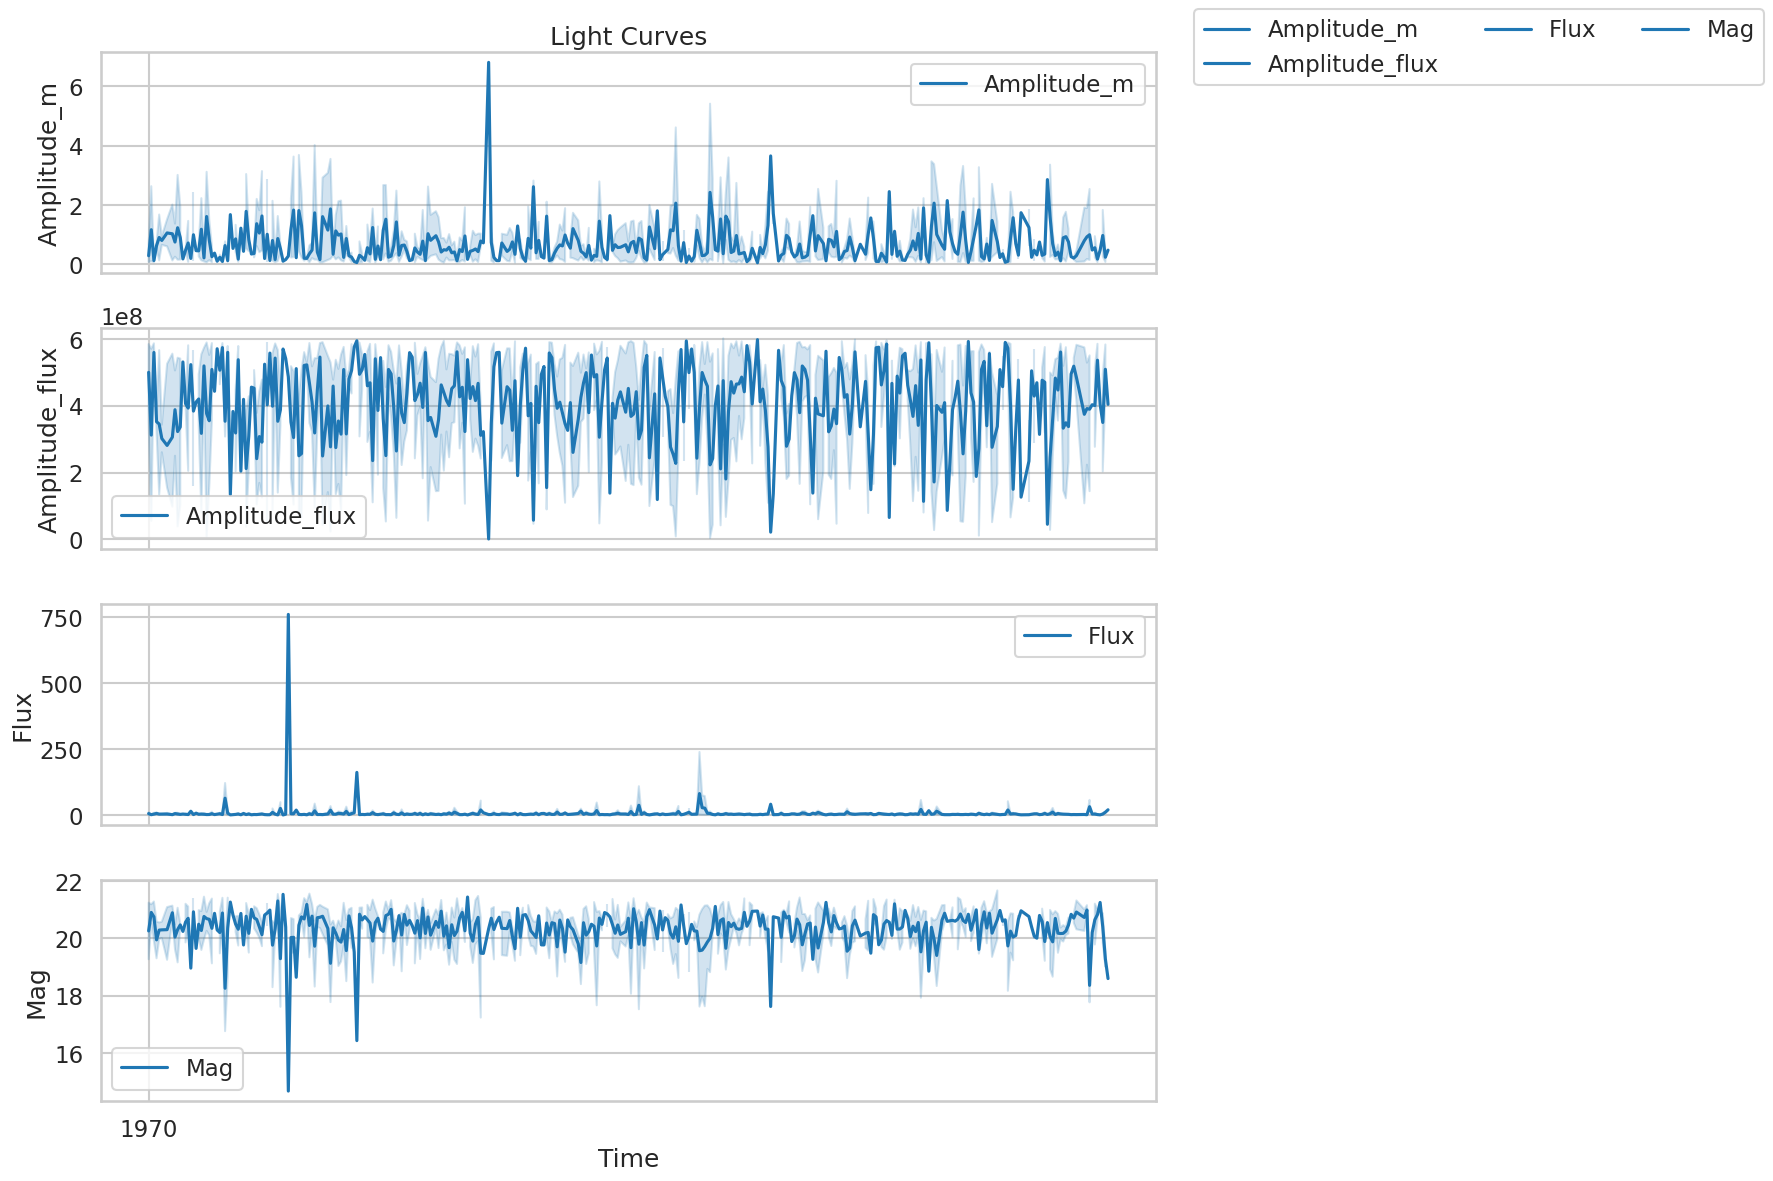

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice theme for the plot
sns.set_style("whitegrid")
sns.set_context("talk")

# Create a figure with three subplots
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 12), sharex=True)

# Plot the light curves for each star
sns.lineplot(x='t_0', y='Amplitude_m', data=df, ax=ax[0], label='Amplitude_m')
sns.lineplot(x='t_0', y='Amplitude_flux', data=df, ax=ax[1], label='Amplitude_flux')
sns.lineplot(x='t_0', y='Flux', data=df, ax=ax[2], label='Flux')
sns.lineplot(x='t_0', y='Mag', data=df, ax=ax[3], label='Mag')

# Customize the plot
ax[0].set_title('Light Curves')
ax[0].set_ylabel('Amplitude_m')
ax[1].set_ylabel('Amplitude_flux')
ax[2].set_ylabel('Flux')
ax[2].set_xlabel('Time')
ax[3].set_ylabel('Mag')
ax[3].set_xlabel('Time')

# Add a legend
fig.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=3)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np  # Import numpy

# Assuming df is your DataFrame and 'SNR' is the target column
# Prepare data
X = df.drop(['Event_Type'], axis=1)  # Features
y = df['Event_Type']  # Target variable

# Convert datetime columns to numerical values
for column in X.columns:
    if pd.api.types.is_datetime64_any_dtype(X[column]):
        # Example: Extract year, month, day, etc.
        X[column + '_year'] = X[column].dt.year
        X[column + '_month'] = X[column].dt.month
        X[column + '_day'] = X[column].dt.day
        # Drop the original datetime column
        X.drop(column, axis=1, inplace=True)

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute or drop NaN values (choose one method)
# Method 1: Drop rows with NaN values
# X.dropna(inplace=True)

# Method 2: Impute NaN values with the mean of the column
# X.fillna(X.mean(), inplace=True)

# Encode categorical target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       107
           1       0.97      1.00      0.98        30
           2       0.98      0.98      0.98        63

    accuracy                           0.99       200
   macro avg       0.98      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
[[106   0   1]
 [  0  30   0]
 [  0   1  62]]


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBRFClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is DataFrame and 'Event_Type' is the target column
# Prepare data
X = df.drop(['Event_Type'], axis=1)  # Features
y = df['Event_Type']  # Target variable

# Convert datetime columns to numerical values
for column in X.columns:
    if pd.api.types.is_datetime64_any_dtype(X[column]):
        # Example: Extract year, month, day, etc.
        X[column + '_year'] = X[column].dt.year
        X[column + '_month'] = X[column].dt.month
        X[column + '_day'] = X[column].dt.day
        # Drop the original datetime column
        X.drop(column, axis=1, inplace=True)

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Encode categorical target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'SVM': SVC(kernel='linear', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),



}






Neural Network
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.55      0.69       107
           1       0.56      0.17      0.26        30
           2       0.45      0.92      0.61        63

    accuracy                           0.61       200
   macro avg       0.65      0.55      0.52       200
weighted avg       0.73      0.61      0.60       200



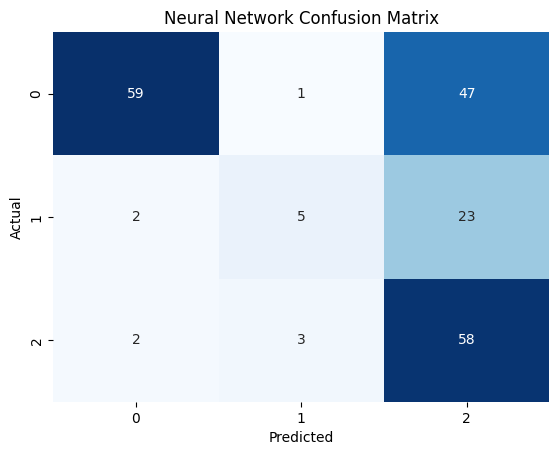

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBRFClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is  DataFrame and 'Event_Type' is the target column
# Prepare data
X = df.drop(['Event_Type'], axis=1)  # Features
y = df['Event_Type']  # Target variable

# Convert datetime columns to numerical values
for column in X.columns:
    if pd.api.types.is_datetime64_any_dtype(X[column]):
        # Example: Extract year, month, day, etc.
        X[column + '_year'] = X[column].dt.year
        X[column + '_month'] = X[column].dt.month
        X[column + '_day'] = X[column].dt.day
        # Drop the original datetime column
        X.drop(column, axis=1, inplace=True)

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Encode categorical target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {

    'Neural Network': MLPClassifier(random_state=42),







}

# Train and evaluate each model



for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print evaluation metrics print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_rep)

    # Plot confusion matrix plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()




In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Import precision_score, recall_score, and f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score # Added the missing imports here
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBRFClassifier
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


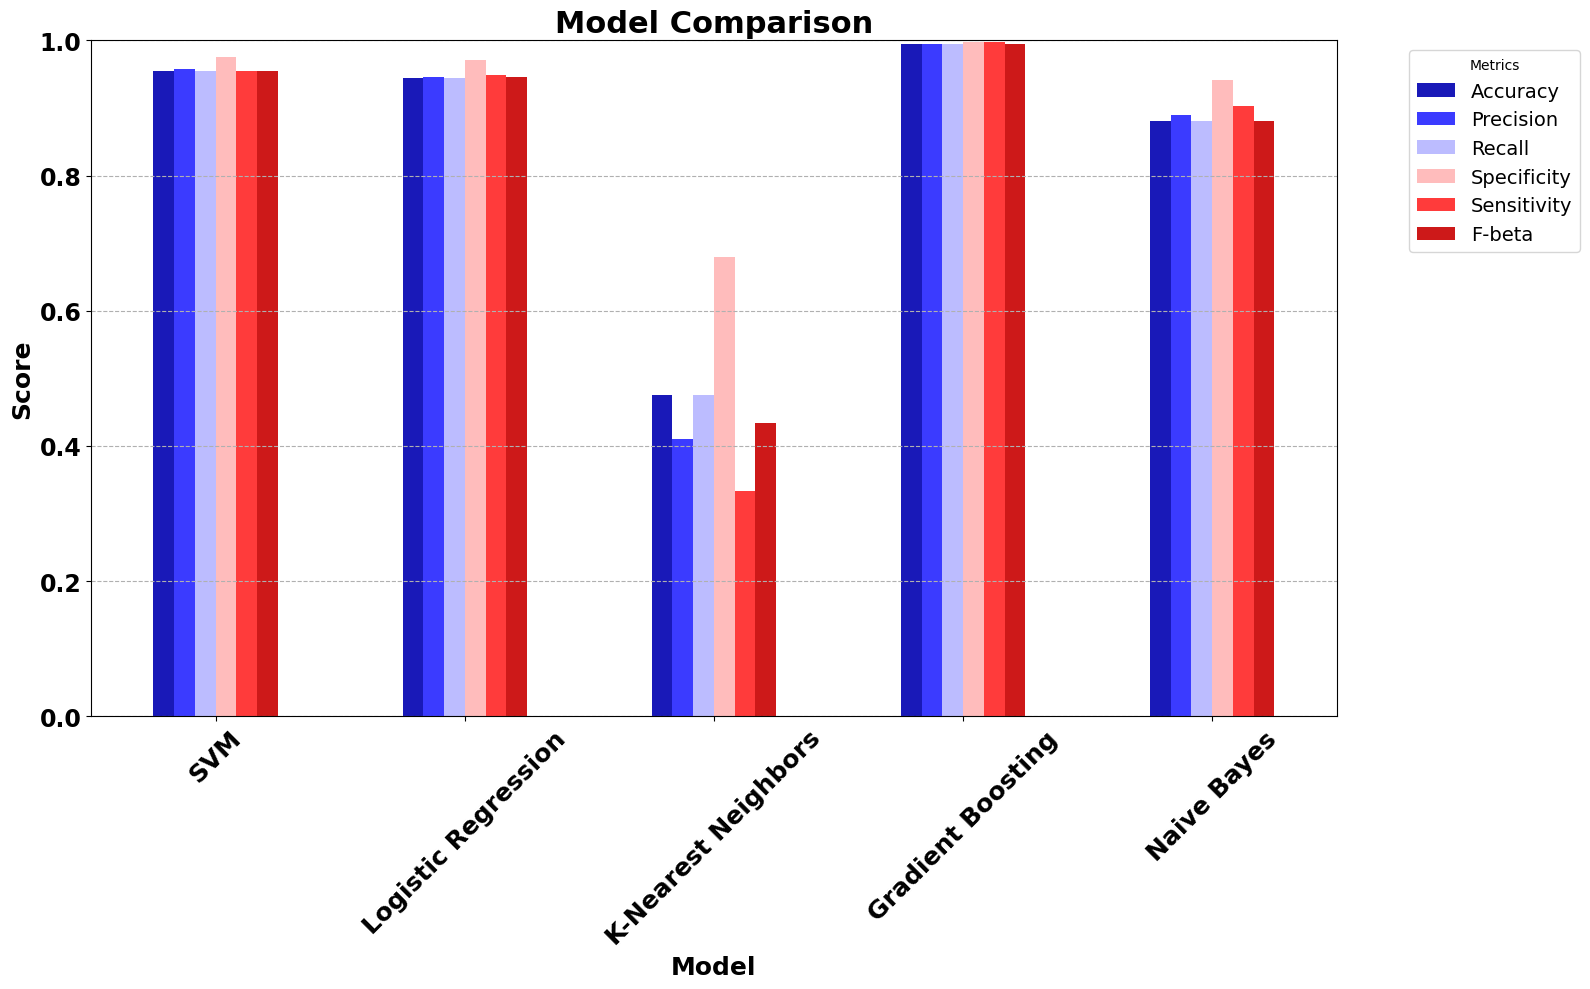

In [8]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, and y_test are defined

models = {
    'SVM': SVC(kernel='linear', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB(),

   }

# Initialize metrics storage
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'Specificity': [],
    'Sensitivity': [],
    'F-beta': [],
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    # Get the confusion matrix
    cm = confusion_matrix(y_test, y_pred)


    # Assuming binary classification for specificity and sensitivity calculation
    # Adjust the positive class label (1 in this case) if needed
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    # Assuming you want to calculate per-class specificity and sensitivity
    specificity_list = TN / (TN + FP)
    sensitivity_list = TP / (TP + FN)

    # Average Specificity and Sensitivity for overall metrics (e.g., macro-average)
    specificity = np.mean(specificity_list)
    sensitivity = np.mean(sensitivity_list)


    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metrics['Specificity'].append(specificity)
    metrics['Sensitivity'].append(sensitivity)
    metrics['F-beta'].append(f1_score(y_test, y_pred, average='weighted'))

# Create DataFrame for metrics
metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Model', inplace=True)

# Plotting
colors = sns.color_palette("seismic", len(metrics_df.columns))  # Use a color palette
metrics_df.plot(kind='bar', figsize=(16, 10), color=colors, alpha=0.9)
plt.title("Model Comparison", fontsize=22, fontweight='bold')
plt.xlabel('Model', fontsize=18, fontweight='bold')
plt.ylabel('Score', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=18, fontweight='bold')
plt.yticks(fontsize=17, fontweight='bold')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.legend(title='Metrics', fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Assuming df is our DataFrame and 'SNR' is the target column
# Prepare data
X = df.drop(['SNR'], axis=1)  # Features
y = df['SNR']  # Target variable (now a continuous variable for regression)

# Convert datetime columns to numerical values
for column in X.columns:
    if pd.api.types.is_datetime64_any_dtype(X[column]):
        # Example: Extract year, month, day, etc.
        X[column + '_year'] = X[column].dt.year
        X[column + '_month'] = X[column].dt.month
        X[column + '_day'] = X[column].dt.day
        # Drop the original datetime column
        X.drop(column, axis=1, inplace=True)

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute or drop NaN values (choose one method)
# Method 1: Drop rows with NaN values
# X.dropna(inplace=True)

# Method 2: Impute NaN values with the mean of the column
# ----> MODIFIED SECTION START
# Calculate the mean only for numeric columns
numeric_cols = X.select_dtypes(include=np.number).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

# Impute or drop NaN values in the target variable 'y'
# Option 1: Drop rows with NaN in 'y'
# df = df.dropna(subset=['SNR'])  # Drop rows where 'SNR' is NaN
# X = df.drop(['SNR'], axis=1)
# y = df['SNR']

# Option 2: Impute NaN in 'y' with the mean (or median)
y = y.fillna(y.mean())  # Or use y.fillna(y.median()) for median imputation
# ----> MODIFIED SECTION END

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse_output=False for dense output
encoded_data = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded data
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.35
Mean Absolute Error (MAE): 0.05
R-squared (R2): 0.93


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming df is your DataFrame and 'SNR' is the target column
# Prepare data
X = df.drop(['SNR'], axis=1)  # Features
y = df['SNR']  # Target variable (now a continuous variable for regression)

# Convert datetime columns to numerical values
for column in X.columns:
    if pd.api.types.is_datetime64_any_dtype(X[column]):
        # Example: Extract year, month, day, etc.
        X[column + '_year'] = X[column].dt.year
        X[column + '_month'] = X[column].dt.month
        X[column + '_day'] = X[column].dt.day
        # Drop the original datetime column
        X.drop(column, axis=1, inplace=True)

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculate the mean only for numeric columns
numeric_cols = X.select_dtypes(include=np.number).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

# Impute NaN values in the target variable 'y'
y = y.fillna(y.mean())

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded data
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR()

}

# Store evaluation metrics
results = {}

# Train models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R-squared": r2
    }


Random Forest:
  Mean Squared Error: 0.35
  Mean Absolute Error: 0.05
  R-squared: 0.93
Decision Tree:
  Mean Squared Error: 0.02
  Mean Absolute Error: 0.02
  R-squared: 1.00
Extra Trees:
  Mean Squared Error: 0.13
  Mean Absolute Error: 0.03
  R-squared: 0.97
Support Vector Regression:
  Mean Squared Error: 4.19
  Mean Absolute Error: 0.73
  R-squared: 0.19


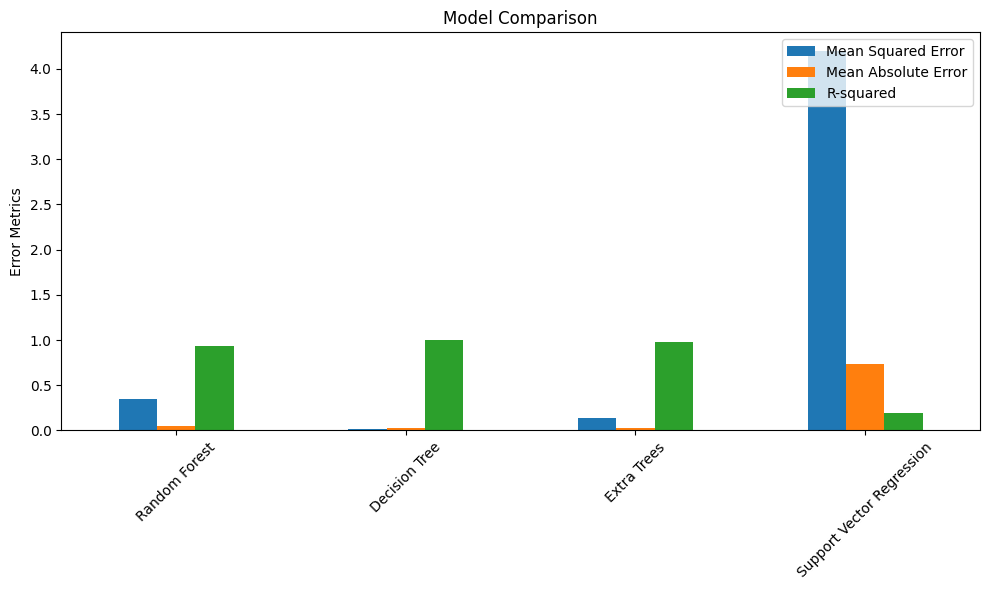

In [11]:

# Print evaluation metrics
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.2f}")

# Plotting the results
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Error Metrics')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


Random Forest:
  Mean Squared Error: 0.35
  Mean Absolute Error: 0.05
  R-squared: 0.93
Decision Tree:
  Mean Squared Error: 1.27
  Mean Absolute Error: 0.15
  R-squared: 0.76
Extra Trees:
  Mean Squared Error: 0.13
  Mean Absolute Error: 0.03
  R-squared: 0.97
Support Vector Regression:
  Mean Squared Error: 4.19
  Mean Absolute Error: 0.73
  R-squared: 0.19


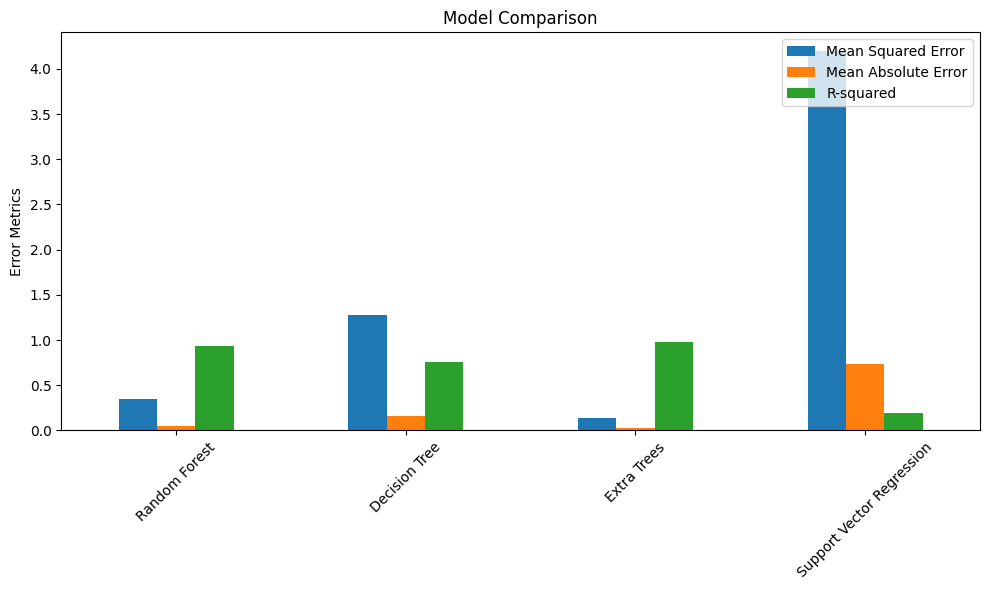

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'SNR' is the target column
# Prepare data
X = df.drop(['SNR'], axis=1)  # Features
y = df['SNR']  # Target variable (now a continuous variable for regression)

# Convert datetime columns to numerical values
for column in X.columns:
    if pd.api.types.is_datetime64_any_dtype(X[column]):
        # Example: Extract year, month, day, etc.
        X[column + '_year'] = X[column].dt.year
        X[column + '_month'] = X[column].dt.month
        X[column + '_day'] = X[column].dt.day
        # Drop the original datetime column
        X.drop(column, axis=1, inplace=True)

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculate the mean only for numeric columns
numeric_cols = X.select_dtypes(include=np.number).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

# Impute NaN values in the target variable 'y'
y = y.fillna(y.mean())

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded data
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42),  # Modified Decision Tree
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR()
}

# Store evaluation metrics
results = {}

# Train models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R-squared": r2
    }

# Print evaluation metrics
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.2f}")

# Plotting the results
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Error Metrics')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
